#Modified from "XengKPreProcess.Rmd", author: "Carly Muletz Wolz", date: "2/15/2022", output: html_document
#This is the preprocessing files of dada2 processed data. OUtput will be used in statistical analyses.

In [1]:
library(phyloseq)
library(ape)
library(vegan)
library(ggplot2)
library(Biostrings)
library(devtools)
library(ranacapa)
library(decontam)

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: ‘IRanges’


The following object is masked from ‘pac

#use this to install ranacapa package if needed devtools::install_github("gauravsk/ranacapa")

In [2]:
setwd("/home/joe/Documents/Smithsonian/XenopusProbioticProject/CombinedRunFiles_combined_with_dada2")

In [3]:
getwd()

[1] "/home/joe/Documents/Smithsonian/XenopusProbioticProject/CombinedRunFiles_combined_with_dada2"

#this is site by species matrix, need row.names = 1 to have phyloseq read it

In [4]:
featureTab <- read.csv("vJDM_XENGPRO2022_feature_table_comborun.csv", header = T, row.names = 1)

#make compatible for phyloseq format

In [5]:
featureTab = otu_table(featureTab, taxa_are_rows = TRUE)

In [6]:
dim(featureTab)

[1] 2676  265

##indicates 2676 taxa by 265 samples

#Read taxonomy info in, make matrix and compatible for phyloseq

In [7]:
tax_all <- tax_table(as.matrix(read.csv("vJDM_XENGPRO2022_taxonomy_comborun.csv", row.names = 1)))

In [8]:
meta_data <- sample_data(read.csv("MetaProbExpAug2022.csv", header = T, row.names = 1))

##SampleID is now row.names, still useful to have SampleID in metadata so add in

In [9]:
meta_data$SampleID <- row.names(meta_data)

#Read in sequence data, may need if you want to look at or subset the DNA sequences at some point

In [10]:
seqs <- readDNAStringSet("vJDM_XENGPRO2022_DNAsequences_combo.fasta")

#Optional: You can also add a phylogenetic tree here, if you have one
#using library(ape)
#tree = read.tree("FinalRFiles/exported-tree/SalAMPtree.nwk")

#Merge it all together

In [11]:
xk <- merge_phyloseq(featureTab, tax_all, meta_data, seqs) #tree)

In [12]:
xk

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2676 taxa and 262 samples ]
sample_data() Sample Data:       [ 262 samples by 16 sample variables ]
tax_table()   Taxonomy Table:    [ 2676 taxa by 7 taxonomic ranks ]
refseq()      DNAStringSet:      [ 2676 reference sequences ]

In [13]:
dim(featureTab)

[1] 2676  265

In [14]:
sample_names(featureTab)

[1] "CF10D0"       "CF10W1"       "CF11D0"       "CF11W1"       "CF12D0"      
  [6] "CF12W1"       "CF13D0"       "CF13W1"       "CF13W2"       "CF13W3"      
 [11] "CF14D0"       "CF14W1"       "CF14W2"       "CF14W3"       "CF15D0"      
 [16] "CF15W1"       "CF15W2"       "CF15W3"       "CF16D0"       "CF16W1"      
 [21] "CF16W2"       "CF16W3"       "CF17D0"       "CF17W1"       "CF17W2"      
 [26] "CF17W3"       "CF18D0"       "CF18W1"       "CF18W2"       "CF18W3"      
 [31] "CF1D0"        "CF1W1"        "CF2D0"        "CF2W1"        "CF3D0"       
 [36] "CF3W1"        "CF4D0"        "CF4W1"        "CF5D0"        "CF5W1"       
 [41] "CF6D0"        "CF6W1"        "CF7D0"        "CF7W1"        "CF8D0"       
 [46] "CF8W1"        "CF9D0"        "CF9W1"        "ContSwabD0"   "ContSwabW1S1"
 [51] "ContSwabW1S2" "ContSwabW2S1" "ContSwabW3S1" "NPC1006221"   "NPC1017221"  
 [56] "NPC1017222"   "NPC91522"     "NXC100522"    "NXC101322"    "NXC10322"    
 [61] "NXC91322"     "NXC92222"     "NXC92722"     "P1F10D0"      "P1F10W1"     
 [66] "P1F11D0"      "P1F11W1"      "P1F12D0"      "P1F12W1"      "P1F13D0"     
 [71] "P1F13W1"      "P1F13W2"      "P1F13W3"      "P1F14D0"      "P1F14W1"     
 [76] "P1F14W2"      "P1F14W3"      "P1F15D0"      "P1F15W1"      "P1F15W2"     
 [81] "P1F15W3"      "P1F16D0"      "P1F16W1"      "P1F16W2"      "P1F16W3"     
 [86] "P1F17D0"      "P1F17W1"      "P1F17W2"      "P1F17W3"      "P1F18D0"     
 [91] "P1F18W1"      "P1F18W2"      "P1F18W3"      "P1F1D0"       "P1F1W1"      
 [96] "P1F2D0"       "P1F2W1"       "P1F3D0"       "P1F3W1"       "P1F4D0"      
[101] "P1F4W1"       "P1F5D0"       "P1F5W1"       "P1F6D0"       "P1F6W1"      
[106] "P1F7D0"       "P1F7W1"       "P1F8D0"       "P1F8W1"       "P1F9D0"      
[111] "P1F9W1"       "P2F10D0"      "P2F10W1"      "P2F11D0"      "P2F11W1"     
[116] "P2F12D0"      "P2F12W1"      "P2F13D0"      "P2F13W1"      "P2F13W2"     
[121] "P2F13W3"      "P2F14D0"      "P2F14W1"      "P2F14W2"      "P2F14W3"     
[126] "P2F15D0"      "P2F15W1"      "P2F15W2"      "P2F15W3"      "P2F16D0"     
[131] "P2F16W1"      "P2F16W2"      "P2F16W3"      "P2F17D0"      "P2F17W1"     
[136] "P2F17W2"      "P2F17W3"      "P2F18D0"      "P2F18W1"      "P2F18W2"     
[141] "P2F18W3"      "P2F1D0"       "P2F1W1"       "P2F2D0"       "P2F2W1"      
[146] "P2F3D0"       "P2F3W1"       "P2F4D0"       "P2F4W1"       "P2F5D0"      
[151] "P2F5W1"       "P2F6D0"       "P2F6W1"       "P2F7D0"       "P2F7W1"      
[156] "P2F8D0"       "P2F8W1"       "P2F9D0"       "P2F9W1"       "P3F10D0"     
[161] "P3F10W1"      "P3F11D0"      "P3F11W1"      "P3F12D0"      "P3F12W1"     
[166] "P3F13D0"      "P3F13W1"      "P3F13W2"      "P3F13W3"      "P3F14D0"     
[171] "P3F14W1"      "P3F14W2"      "P3F14W3"      "P3F15D0"      "P3F15W1"     
[176] "P3F15W2"      "P3F15W3"      "P3F16D0"      "P3F16W1"      "P3F16W2"     
[181] "P3F16W3"      "P3F17D0"      "P3F17W1"      "P3F17W2"      "P3F17W3"     
[186] "P3F18D0"      "P3F18W1"      "P3F18W2"      "P3F18W3"      "P3F1D0"      
[191] "P3F1W1"       "P3F2D0"       "P3F2W1"       "P3F3D0"       "P3F3W1"      
[196] "P3F4D0"       "P3F4W1"       "P3F5D0"       "P3F5W1"       "P3F6D0"      
[201] "P3F6W1"       "P3F7D0"       "P3F7W1"       "P3F8D0"       "P3F8W1"      
[206] "P3F9D0"       "P3F9W1"       "P4F10D0"      "P4F10W1"      "P4F11D0"     
[211] "P4F11W1"      "P4F12D0"      "P4F12W1"      "P4F13D0"      "P4F13W1"     
[216] "P4F13W2"      "P4F13W3"      "P4F14D0"      "P4F14W1"      "P4F14W2"     
[221] "P4F14W3"      "P4F15D0"      "P4F15W1"      "P4F15W2"      "P4F15W3"     
[226] "P4F16D0"      "P4F16W1"      "P4F16W2"      "P4F16W3"      "P4F17D0"     
[231] "P4F17W1"      "P4F17W2"      "P4F17W3"      "P4F18D0"      "P4F18W1"     
[236] "P4F18W2"      "P4F18W3"      "P4F1D0"       "P4F1W1"       "P4F2D0"      
[241] "P4F2W1"       "P4F3D0"       "P4F3W1"       "P4F4D0"       "P4F4W1"      
[246] "P4F5D0"       "P4F5W1"    

In [15]:
sample_names(xk)

[1] "CF10D0"       "CF10W1"       "CF11D0"       "CF11W1"       "CF12D0"      
  [6] "CF12W1"       "CF13D0"       "CF13W1"       "CF13W2"       "CF13W3"      
 [11] "CF14D0"       "CF14W1"       "CF14W2"       "CF14W3"       "CF15D0"      
 [16] "CF15W1"       "CF15W2"       "CF15W3"       "CF16D0"       "CF16W1"      
 [21] "CF16W2"       "CF16W3"       "CF17D0"       "CF17W1"       "CF17W2"      
 [26] "CF17W3"       "CF18D0"       "CF18W1"       "CF18W2"       "CF18W3"      
 [31] "CF1D0"        "CF1W1"        "CF2D0"        "CF2W1"        "CF3D0"       
 [36] "CF3W1"        "CF4D0"        "CF4W1"        "CF5D0"        "CF5W1"       
 [41] "CF6D0"        "CF6W1"        "CF7D0"        "CF7W1"        "CF8D0"       
 [46] "CF8W1"        "CF9D0"        "CF9W1"        "ContSwabD0"   "ContSwabW1S1"
 [51] "ContSwabW1S2" "ContSwabW2S1" "ContSwabW3S1" "NPC1006221"   "NPC1017221"  
 [56] "NPC91522"     "NXC100522"    "NXC101322"    "NXC10322"     "NXC91322"    
 [61] "NXC92222"     "P1F10D0"      "P1F10W1"      "P1F11D0"      "P1F11W1"     
 [66] "P1F12D0"      "P1F12W1"      "P1F13D0"      "P1F13W1"      "P1F13W2"     
 [71] "P1F13W3"      "P1F14D0"      "P1F14W1"      "P1F14W2"      "P1F14W3"     
 [76] "P1F15D0"      "P1F15W1"      "P1F15W2"      "P1F15W3"      "P1F16D0"     
 [81] "P1F16W1"      "P1F16W2"      "P1F16W3"      "P1F17D0"      "P1F17W1"     
 [86] "P1F17W2"      "P1F17W3"      "P1F18D0"      "P1F18W1"      "P1F18W2"     
 [91] "P1F18W3"      "P1F1D0"       "P1F1W1"       "P1F2D0"       "P1F2W1"      
 [96] "P1F3D0"       "P1F3W1"       "P1F4D0"       "P1F4W1"       "P1F5D0"      
[101] "P1F5W1"       "P1F6D0"       "P1F6W1"       "P1F7D0"       "P1F7W1"      
[106] "P1F8D0"       "P1F8W1"       "P1F9D0"       "P1F9W1"       "P2F10D0"     
[111] "P2F10W1"      "P2F11D0"      "P2F11W1"      "P2F12D0"      "P2F12W1"     
[116] "P2F13D0"      "P2F13W1"      "P2F13W2"      "P2F13W3"      "P2F14D0"     
[121] "P2F14W1"      "P2F14W2"      "P2F14W3"      "P2F15D0"      "P2F15W1"     
[126] "P2F15W2"      "P2F15W3"      "P2F16D0"      "P2F16W1"      "P2F16W2"     
[131] "P2F16W3"      "P2F17D0"      "P2F17W1"      "P2F17W2"      "P2F17W3"     
[136] "P2F18D0"      "P2F18W1"      "P2F18W2"      "P2F18W3"      "P2F1D0"      
[141] "P2F1W1"       "P2F2D0"       "P2F2W1"       "P2F3D0"       "P2F3W1"      
[146] "P2F4D0"       "P2F4W1"       "P2F5D0"       "P2F5W1"       "P2F6D0"      
[151] "P2F6W1"       "P2F7D0"       "P2F7W1"       "P2F8D0"       "P2F8W1"      
[156] "P2F9D0"       "P2F9W1"       "P3F10D0"      "P3F10W1"      "P3F11D0"     
[161] "P3F11W1"      "P3F12D0"      "P3F12W1"      "P3F13D0"      "P3F13W1"     
[166] "P3F13W2"      "P3F13W3"      "P3F14D0"      "P3F14W1"      "P3F14W2"     
[171] "P3F14W3"      "P3F15D0"      "P3F15W1"      "P3F15W2"      "P3F15W3"     
[176] "P3F16D0"      "P3F16W1"      "P3F16W2"      "P3F16W3"      "P3F17D0"     
[181] "P3F17W1"      "P3F17W2"      "P3F17W3"      "P3F18D0"      "P3F18W1"     
[186] "P3F18W2"      "P3F18W3"      "P3F1D0"       "P3F1W1"       "P3F2D0"      
[191] "P3F2W1"       "P3F3D0"       "P3F3W1"       "P3F4D0"       "P3F4W1"      
[196] "P3F5D0"       "P3F5W1"       "P3F6D0"       "P3F6W1"       "P3F7D0"      
[201] "P3F7W1"       "P3F8D0"       "P3F8W1"       "P3F9D0"       "P3F9W1"      
[206] "P4F10D0"      "P4F10W1"      "P4F11D0"      "P4F11W1"      "P4F12D0"     
[211] "P4F12W1"      "P4F13D0"      "P4F13W1"      "P4F13W2"      "P4F13W3"     
[216] "P4F14D0"      "P4F14W1"      "P4F14W2"      "P4F14W3"      "P4F15D0"     
[221] "P4F15W1"      "P4F15W2"      "P4F15W3"      "P4F16D0"      "P4F16W1"     
[226] "P4F16W2"      "P4F16W3"      "P4F17D0"      "P4F17W1"      "P4F17W2"     
[231] "P4F17W3"      "P4F18D0"      "P4F18W1"      "P4F18W2"      "P4F18W3"     
[236] "P4F1D0"       "P4F1W1"       "P4F2D0"       "P4F2W1"       "P4F3D0"      
[241] "P4F3W1"       "P4F4D0"       "P4F4W1"       "P4F5D0"       "P4F5W1"      
[246] "P4F6D0"       "P4F6W1"    

In [16]:
sum(sample_sums(xk))

[1] 3840280

In [17]:
sort(sample_sums(xk))

NPC1006221   NPC1006222     NXC92222    PXC100522   ContSwabD0    NXC101322 
           0            0            1            1            4            4 
  NPC1017221    NXC100522 ContSwabW1S2     NPC91522 ContSwabW3S1 ContSwabW2S1 
           8            9           15           23           68           84 
     P1F18W1       P1F3D0      P2F11W1      P2F16D0        CF5D0      P1F17W1 
         514          809         1130         1442         1569         1698 
     P1F15W2      P1F12D0      P2F11D0     NXC91322      P3F10D0       P4F3D0 
        2054         2103         2231         2379         2453         2480 
      P2F4D0       CF15W2      P3F17W2      P4F16D0      P2F15D0       P2F5D0 
        2519         2600         2831         2962         3162         3212 
     P4F13W1        CF2W1        CF4D0     PXC92222        CF9D0       CF17D0 
        3306         3360         3561         3651         3667         3744 
      P2F3D0        CF8D0        CF2D0      P3F11D0       P1F7D0        CF7D0 
        3844         3877         3947         4073         4146         4149 
      P3F9D0      P3F13W1      P1F18D0     PXC91322      P3F18D0       P2F2D0 
        4389         4525         4627         5090         5147         5545 
     P3F13D0       CF18W3      P4F13D0      P1F14W1       P1F9W1        CF3D0 
        5699         5733         6032         6064         6265         6319 
      CF13D0      P4F10D0      P3F12W1      P1F17D0      P2F13W3      P4F11D0 
        6492         6578         6791         7376         7603         7608 
     P1F16W2       P1F7W1      P3F17D0       P1F4D0      P4F15W3       P4F2D0 
        7807         7889         7894         8006         8091         8231 
     P4F18D0     NXC10322      P4F14D0       P4F9D0      P4F17D0       P1F6D0 
        8365         8389         8653         8681         8743         8798 
       CF6D0      P1F13W1       P4F9W1       P1F8D0      P2F18W2       P2F6D0 
        9171         9172         9239         9397         9421         9613 
     P4F15W1       P3F5W1       P3F8D0       P2F6W1       P2F3W1      P1F10D0 
        9813         9820         9837         9999        10104        10312 
      P3F6D0       CF15D0       P1F1D0       P1F5W1      P1F14D0      P2F18W3 
       10323        10333        10363        10437        10559        10651 
      P4F5D0       P4F1D0      P1F15W1       P4F4W1        CF3W1      P2F12D0 
       10700        10956        10977        10977        11067        11155 
      P2F1D0      P3F16D0       P3F5D0 ContSwabW1S1       P4F6D0       CF13W2 
       11232        11261        11285        11385        11396        11421 
      P2F8W1      P4F18W1        CF5W1       P4F3W1       P1F2W1      P4F16W2 
       11475        11477        11515        11570        11586        11589 
      P3F2D0      P2F18W1       P1F5D0      P3F15W3      P4F18W3       P4F7D0 
       11702        11802        11981        12101        12135        12195 
      P3F4D0       P2F9W1      P1F13W3      P1F11D0       CF11D0      P3F18W3 
       12252        12315        12341        12346        12470        12613 
     P4F13W2       CF10W1      P3F13W2      P2F13W2      P3F18W2       P4F4D0 
       12653        12692        12756        12956        13136        13504 
      CF13W3       P1F2D0      P2F18D0       CF10D0        CF7W1       CF16W1 
       13608        13616        13655        13819        13956        14128 
     P3F15W1       P3F3W1       CF17W1      P1F16D0      P3F14D0       P2F8D0 
       14378        14494        14682        14791        15109        15166 
     P1F13D0      P4F15W2       P1F8W1       P3F2W1       P3F7D0       P3F4W1 
       15198        15412        15449        15602        15888        15967 
      P3F7W1        CF1D0      P4F15D0      P2F17W1       P1F3W1      P2F16W1 
       16086        16110        16269        16344        16412        16584 
      CF18W1       P1F9D0      P4F13W3        CF9W1 

##Filter singletons (only occur on 1 individual), seems to be a lot of ASVs with little information
##This says needs to occur at least 1 time on at least 2 individual

In [18]:
xk2 <- filter_taxa(xk, function (x) {sum(x > 0) >1}, prune=TRUE)

##Note 2676 taxa and now 1324. I always remove singletons to individuals (note some people call singletons just 1 sequence) as I believe many are spurious. We can check the standards to verify this also.

In [19]:
xk

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2676 taxa and 262 samples ]
sample_data() Sample Data:       [ 262 samples by 16 sample variables ]
tax_table()   Taxonomy Table:    [ 2676 taxa by 7 taxonomic ranks ]
refseq()      DNAStringSet:      [ 2676 reference sequences ]

In [20]:
xk2

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1323 taxa and 262 samples ]
sample_data() Sample Data:       [ 262 samples by 16 sample variables ]
tax_table()   Taxonomy Table:    [ 1323 taxa by 7 taxonomic ranks ]
refseq()      DNAStringSet:      [ 1323 reference sequences ]

##Lost a good bit of taxa, but not many sequences

In [21]:
sum(sample_sums(xk))

[1] 3840280

In [22]:
sum(sample_sums(xk2))

[1] 3818040

In [23]:
sort(sample_sums(xk2))

NPC1006221   NPC1006222    PXC100522     NXC92222   ContSwabD0    NXC101322 
           0            0            0            1            4            4 
  NPC1017221    NXC100522 ContSwabW1S2     NPC91522 ContSwabW3S1 ContSwabW2S1 
           7            7           15           23           68           77 
     P1F18W1       P1F3D0      P2F11W1      P2F16D0        CF5D0      P1F17W1 
         459          807         1127         1442         1549         1690 
     P1F15W2      P1F12D0      P2F11D0     NXC91322      P3F10D0       P4F3D0 
        2049         2103         2231         2378         2443         2476 
      P2F4D0       CF15W2      P3F17W2      P4F16D0      P2F15D0       P2F5D0 
        2519         2575         2816         2961         3157         3212 
     P4F13W1        CF2W1        CF4D0        CF9D0     PXC92222       CF17D0 
        3306         3357         3554         3644         3651         3722 
      P2F3D0        CF8D0        CF2D0      P3F11D0       P1F7D0        CF7D0 
        3840         3869         3911         4073         4139         4142 
      P3F9D0      P3F13W1      P1F18D0     PXC91322      P3F18D0       P2F2D0 
        4389         4525         4625         5090         5147         5536 
      CF18W3      P3F13D0      P4F13D0      P1F14W1       P1F9W1        CF3D0 
        5684         5689         6029         6064         6265         6312 
      CF13D0      P4F10D0      P3F12W1      P1F17D0      P2F13W3      P4F11D0 
        6386         6570         6782         7376         7563         7608 
     P1F16W2       P1F7W1      P3F17D0      P4F15W3       P1F4D0       P4F2D0 
        7795         7859         7875         8004         8006         8213 
     P4F18D0     NXC10322      P4F14D0       P4F9D0      P4F17D0       P1F6D0 
        8355         8385         8640         8672         8711         8781 
       CF6D0       P4F9W1      P1F13W1       P1F8D0      P2F18W2       P2F6D0 
        9114         9151         9161         9375         9421         9603 
     P4F15W1       P3F5W1       P3F8D0       P2F6W1       P2F3W1       P3F6D0 
        9770         9803         9815         9997        10104        10148 
      CF15D0      P1F10D0       P1F1D0       P1F5W1      P1F14D0      P2F18W3 
       10205        10280        10350        10357        10462        10636 
      P4F5D0       P4F1D0       P3F5D0      P1F15W1       P4F4W1       P3F2D0 
       10693        10922        10930        10954        10968        11050 
       CF3W1      P2F12D0       P2F1D0        CF5W1      P3F16D0       P4F6D0 
       11067        11135        11216        11230        11249        11376 
ContSwabW1S1       CF13W2       P2F8W1      P4F18W1       P4F3W1       P1F2W1 
       11378        11414        11464        11473        11559        11575 
     P4F16W2       P4F4D0      P2F18W1       P1F5D0      P3F15W3      P4F18W3 
       11588        11721        11796        11963        12078        12128 
      P4F7D0       P3F4D0      P1F11D0       P2F9W1      P1F13W3       CF11D0 
       12186        12233        12253        12305        12330        12423 
     P3F18W3      P4F13W2       CF10W1      P3F13W2      P2F13W2      P3F18W2 
       12609        12634        12687        12739        12951        13128 
      CF13W3       P1F2D0      P2F18D0       CF10D0        CF7W1       CF16W1 
       13546        13607        13652        13790        13943        14052 
     P3F15W1      P3F14D0       P3F3W1       CF17W1      P1F16D0       P2F8D0 
       14363        14402        14406        14652        14752        15117 
     P1F13D0      P4F15W2       P1F8W1       P3F4W1       P3F2W1       P3F7D0 
       15144        15393        15441        15585        15598        15840 
      P3F7W1        CF1D0      P4F15D0      P2F17W1       P1F3W1      P2F16W1 
       16073        16084        16264        16340        16395        16486 
      CF18W1       P1F9D0      P4F13W3        CF9W1 

##REMOVE chloroplast and eukaryotic sequences

In [24]:
get_taxa_unique(xk2, "Kingdom")

[1] "Bacteria"  "Eukaryota" NA

##The NA may be host mitochondrial, could blast if of interest

In [25]:
Euk <- subset_taxa(xk2, Kingdom %in% c("Eukaryota", NA))

In [26]:
tax_table(Euk)

,Kingdom,Phylum,Class,Order,Family,Genus,Species
ASV37,Eukaryota,NA,NA,NA,NA,NA,NA
ASV62,Eukaryota,NA,NA,NA,NA,NA,NA
ASV64,NA,NA,NA,NA,NA,NA,NA
ASV65,Eukaryota,NA,NA,NA,NA,NA,NA
ASV83,NA,NA,NA,NA,NA,NA,NA
ASV86,NA,NA,NA,NA,NA,NA,NA
ASV89,Eukaryota,NA,NA,NA,NA,NA,NA
ASV90,Eukaryota,NA,NA,NA,NA,NA,NA
ASV101,Eukaryota,NA,NA,NA,NA,NA,NA
ASV103,NA,NA,NA,NA,NA,NA,NA


In [27]:
xk3 = subset_taxa(xk2, Kingdom %in% c("Bacteria", "Archaea"))

In [28]:
xk3 <- subset_taxa(xk3, Class != "Chloroplast")

In [29]:
xk3

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1214 taxa and 262 samples ]
sample_data() Sample Data:       [ 262 samples by 16 sample variables ]
tax_table()   Taxonomy Table:    [ 1214 taxa by 7 taxonomic ranks ]
refseq()      DNAStringSet:      [ 1214 reference sequences ]

###Let's look at the positive standards first, then remove for contaminant filtering
###We recover all the bacterial taxa that should be there and in relatively similar relative abundances to what is expected, but there are extra that shouldn't be there
####See ZymoStandards-Taxonomy-Compare for more info

In [30]:
MicroStClean <- subset_samples(xk3, Sample.type %in% c("PXC", "PPC"))

##Are there ASVs that are lingering?

In [31]:
sum(taxa_sums(MicroStClean) == 0)

[1] 1199

##getting rid of ASVs that are not in samples of interest

In [32]:
MicroStClean = filter_taxa(MicroStClean, function(x) sum(x) !=0, TRUE)

In [33]:
MicroStClean <- transform_sample_counts(MicroStClean, function(x) x/sum(x))

In [34]:
otu_table(MicroStClean)

,PPC100622,PPC101722,PPC91522,PXC101322,PXC10322,PXC91322,PXC92222,PXC100522
ASV1,0.000000000,0.00000000,0.0005519271,0.000000000,0.00000000,0.0000000000,0.000000000,NaN
ASV2,0.000000000,0.00000000,0.0000000000,0.000000000,0.00000000,0.0003929273,0.000000000,NaN
ASV5,0.000000000,0.00000000,0.0001839757,0.000000000,0.00000000,0.0000000000,0.000000000,NaN
ASV13,0.000000000,0.00000000,0.0002299696,0.000000000,0.00000000,0.0000000000,0.000000000,NaN
ASV15,0.219165927,0.21428805,0.2745377610,0.209749924,0.21785398,0.4013752456,0.394960285,NaN
ASV23,0.119195504,0.12467728,0.1749149112,0.184043992,0.18873781,0.1510805501,0.080799781,NaN
ASV28,0.101695751,0.11222589,0.2081685218,0.131671977,0.13104739,0.0522593320,0.077786908,NaN
ASV35,0.119639160,0.12670349,0.0194094380,0.130886396,0.12257365,0.0803536346,0.118871542,NaN
ASV40,0.125308094,0.12376221,0.0776377518,0.070484005,0.06370086,0.0591355599,0.052862230,NaN
ASV41,0.134279799,0.11016700,0.0200533530,0.096102649,0.09518179,0.0754420432,0.094768557,NaN


In [35]:
dfo <- as.data.frame(otu_table(MicroStClean))

##column 6 is genus, or change to the column of genus

In [36]:
tax_table(MicroStClean)[,6]

,Genus
ASV1,Romboutsia
ASV2,NA
ASV5,Clostridium sensu stricto 1
ASV13,Fluviicola
ASV15,Bacillus
ASV23,Escherichia-Shigella
ASV28,Salmonella
ASV35,Limosilactobacillus
ASV40,Listeria
ASV41,Staphylococcus


In [37]:
dft <- as.data.frame(tax_table(MicroStClean)[,6])

In [38]:
dfpc <- cbind(dfo, dft)

In [39]:
dfpc[order(dfpc$Genus), ]

,PPC100622,PPC101722,PPC91522,PXC101322,PXC10322,PXC91322,PXC92222,PXC100522,Genus
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ASV15,0.219165927,0.21428805,0.2745377610,0.209749924,0.21785398,0.4013752456,0.394960285,NaN,Bacillus
ASV5,0.000000000,0.00000000,0.0001839757,0.000000000,0.00000000,0.0000000000,0.000000000,NaN,Clostridium sensu stricto 1
ASV52,0.089569161,0.07670185,0.0389108638,0.073800899,0.06542517,0.0581532417,0.087373322,NaN,Enterococcus
ASV23,0.119195504,0.12467728,0.1749149112,0.184043992,0.18873781,0.1510805501,0.080799781,NaN,Escherichia-Shigella
ASV157,0.008478754,0.01415079,0.0177996504,0.009863396,0.01571583,0.0361493124,0.009586415,NaN,Escherichia-Shigella
ASV13,0.000000000,0.00000000,0.0002299696,0.000000000,0.00000000,0.0000000000,0.000000000,NaN,Fluviicola
ASV35,0.119639160,0.12670349,0.0194094380,0.130886396,0.12257365,0.0803536346,0.118871542,NaN,Limosilactobacillus
ASV40,0.125308094,0.12376221,0.0776377518,0.070484005,0.06370086,0.0591355599,0.052862230,NaN,Listeria
ASV47,0.063393473,0.06925063,0.1144788888,0.068170907,0.06458764,0.0776031434,0.078608600,NaN,Pseudomonas


#Check positive controls have correct bacteria present. Can look in feature table two and taxanomy files. Will also tell you below. Take into account there can be different names for same bacteria species due to re-classification

###Genus	Truth, same for both extraction and PCR controls

#Bacillus	0.3
#Enterococcus	0.07
#Escherichia/Shigella	0.15
#Lactobacillus	0.13
#Listeria	0.12
#Pseudomonas	0.07
#Salmonella	0.10
#Staphylococcus	0.1

#Clostridium contam? in PPC91522
#Fluviicola contam in PPC91522
#Romboutsia contam in PPC91522

#Controls look good, PPC91522 has contams

##Let's see if decontam removes them

##can write a file too and make plot

In [40]:
site_species <-as(otu_table(MicroStClean), "matrix")

In [41]:
taxonomy <- as(tax_table(MicroStClean), "matrix")

In [42]:
write.csv(cbind(site_species, taxonomy), "ZymoStandards.csv")

In [43]:
st <- psmelt(MicroStClean) # create dataframe from phyloseq object

In [44]:
st <- subset(st, Abundance > 0)

In [45]:
plot.rel.ab2 <- ggplot(data=st, aes(x=Sample, y=Abundance, fill=Genus))

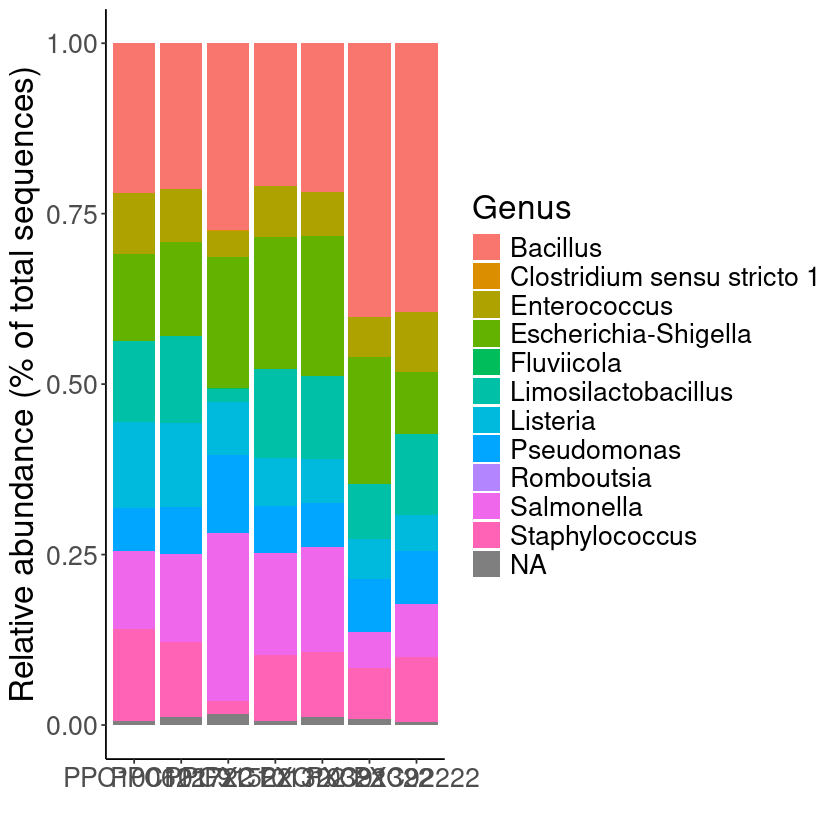

In [46]:
plot.rel.ab2 + geom_bar(aes(), stat="identity", position="stack")  +
  ylab("Relative abundance (% of total sequences)") +theme_classic() + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + theme_bw()  +
  theme_classic()+ labs(x = "")+ theme(text = element_text(size = 20))

###Let's come back and look at these after filtering contaminants. Copied below when you need to look at it again

##Go back to before we removed singletons, interested if singletons are showing up in standards...

In [47]:
MicroStPrePre <- subset_samples(xk, Sample.type %in% c("PXC", "PPC"))

In [48]:
MicroStPrePre <- filter_taxa(MicroStPrePre, function(x) sum(x) !=0, TRUE)

In [49]:
otu_table(MicroStPrePre)

,PPC100622,PPC101722,PPC91522,PXC101322,PXC10322,PXC91322,PXC92222,PXC100522
ASV1,0,0,12,0,0,0,0,0
ASV2,0,0,0,0,0,2,0,0
ASV5,0,0,4,0,0,0,0,0
ASV13,0,0,5,0,0,0,0,0
ASV15,4446,6557,5969,4806,4422,2043,1442,0
ASV23,2418,3815,3803,4217,3831,769,295,0
ASV28,2063,3434,4526,3017,2660,266,284,0
ASV35,2427,3877,422,2999,2488,409,434,0
ASV40,2542,3787,1688,1615,1293,301,193,0
ASV41,2724,3371,436,2202,1932,384,346,0


In [50]:
tax_table(MicroStPrePre)

,Kingdom,Phylum,Class,Order,Family,Genus,Species
ASV1,Bacteria,Firmicutes,Clostridia,Peptostreptococcales-Tissierellales,Peptostreptococcaceae,Romboutsia,NA
ASV2,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Rubritaleaceae,NA,NA
ASV5,Bacteria,Firmicutes,Clostridia,Clostridiales,Clostridiaceae,Clostridium sensu stricto 1,NA
ASV13,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Crocinitomicaceae,Fluviicola,NA
ASV15,Bacteria,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus,NA
ASV23,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia-Shigella,NA
ASV28,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Salmonella,NA
ASV35,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Limosilactobacillus,NA
ASV40,Bacteria,Firmicutes,Bacilli,Lactobacillales,Listeriaceae,Listeria,NA
ASV41,Bacteria,Firmicutes,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,NA


###Hmmmm...wow, good to check. Important to remove singletons!

###Contaminant filter

####See more: https://benjjneb.github.io/decontam/vignettes/decontam_intro.html

In [52]:
#library(decontam)

In [53]:
#install.packages("decontam")

In [54]:
#if (!require("BiocManager", quietly = TRUE))
    #install.packages("BiocManager")

#BiocManager::install("decontam", force = TRUE)

In [55]:
#.libpaths()

##Says in paper that combined method provides the best bimodal distribution 

##suggesting that is will be the more robust classification when both data types

##are present, which we have

##NOTE: you need to put in your DNA quant readings that you used for pooling your library into the metadata file and call it quant_reading. Look a the tutorial indicated above

##ALSO later you need a column that says Sample_or_Control

##Keep positive controls in right now, will relook at and assess

In [51]:
sample_data(xk3)$is.neg <- sample_data(xk3)$Sample.type == "Control"

##it will filter out samples with zero total count frequencies, this will cause an error when you go to plot_frequency. Below, I fixed it by removing the zero counts before doing the isContaminant(). 

#If you do not prune samples with 0 counts, will cause error when plotting

In [52]:
non.zero <- sample_sums(xk3) > 0

In [53]:
ps.nonzero <- prune_samples(non.zero, xk3)

In [54]:
ps.nonzero

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1214 taxa and 259 samples ]
sample_data() Sample Data:       [ 259 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 1214 taxa by 7 taxonomic ranks ]
refseq()      DNAStringSet:      [ 1214 reference sequences ]

#Then go forward with ps.nonzero. Removed 4 samples with 0 counts

##Using combined based on paper recommendation

In [55]:
contamdf.combined <- isContaminant(ps.nonzero, method="combined", neg="is.neg", conc = "quant_reading")

##If error, make sure all have quant readings. For too low qubit readings - I put 0.05. In this data set, all samples have higher quant readings

In [56]:
sample_data(ps.nonzero)$quant_reading

[1]  25.400  43.200  18.900  50.200  35.600  46.800   8.600  54.600  58.400
 [10]  38.400  24.400  46.200  66.600  63.400  15.700  54.800  42.600  45.000
 [19]  33.200  47.400  76.000  59.000   3.380  49.600  68.800  66.400  29.400
 [28]  40.000  63.400  29.800  14.300  49.000   2.980  37.400  96.000  51.800
 [37]   4.540  57.000   0.050  41.000   9.480  55.400  45.600  49.400   4.360
 [46]  59.400   0.050  62.200   0.050   0.050   0.050   0.050   0.050   0.050
 [55]   0.050   0.050   0.050   0.050   0.050   0.050   0.656   8.980  27.200
 [64]  47.000   0.050  51.400  19.200  40.200  53.800  48.000  32.600  38.600
 [73]  71.000  67.400  24.400  38.200   0.050  55.600  35.600  62.400  32.600
 [82]  67.800  66.800   0.050  53.000  73.800  25.000   0.050  54.200  69.600
 [91]  18.000  35.600  38.600  35.400   0.050  59.000  11.300  53.000  27.400
[100]  39.600  27.000  56.200  10.900  26.200   8.020  35.200  39.200  44.000
[109]  47.200  63.000   0.050   0.050  26.800  38.400  16.700  66.600  36.400
[118]  20.800  42.400  57.000  28.000  60.800  18.900  45.200  37.200  41.600
[127]   0.050  50.600  60.000  62.800  25.400  57.800  50.600  60.000  40.800
[136]  40.600  35.000  50.800  24.200  55.600  22.200  57.400  85.600  44.600
[145]   0.050  63.600  34.200  67.400  21.600  41.400   5.980  69.800  46.800
[154]  55.800  10.400  34.000   0.050  66.000  53.600  63.600  55.400  61.000
[163]  24.400  33.600  37.800  80.200   0.050  72.600  56.400  42.800  18.500
[172]  55.800  51.800  41.200  13.200  16.700  56.000  61.000  23.800  50.200
[181]  32.000  65.000  21.600  59.000  36.200  39.400  63.200  65.600  29.000
[190]  56.000  21.000  67.800  29.800  57.400  46.000  43.400  42.000  65.200
[199]  20.600  49.400  15.300  44.400  31.600  55.200  35.000  74.400  33.800
[208]  53.400  35.600  52.400  24.400  86.200  52.600  41.200  37.400  60.000
[217]  84.800  69.400  37.400  47.400  45.200  18.500  34.000  76.800  66.800
[226]  56.200  51.200  41.200  70.800  68.600  32.200  44.600  75.000  90.400
[235]  47.000  61.000  35.200  52.000   0.050  46.600  14.700  43.600  64.800
[244]  70.400  15.600  51.400  17.200  60.400  41.600  62.000 101.000  57.800
[253]   0.050   0.050   0.050   0.050   0.050   0.050   0.050

In [57]:
table(contamdf.combined$contaminant)


FALSE  TRUE 
 1201    13 

#12True, 1201 false

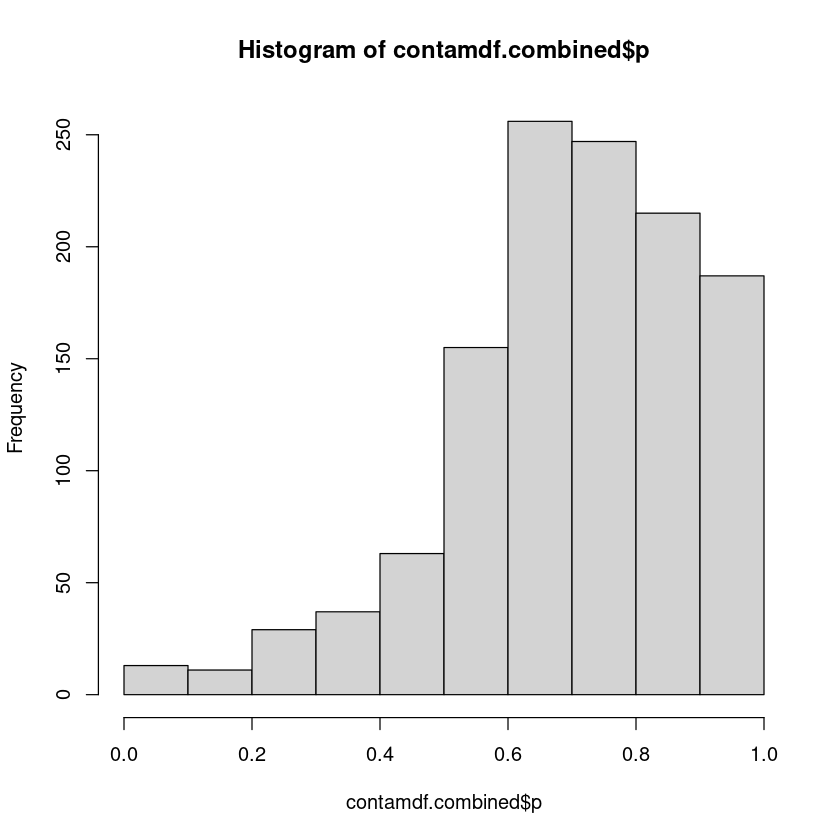

In [58]:
hist(contamdf.combined$p)

#Then go forward with ps.nonzero. Removed 4 samples with 0 counts

In [59]:
ps.pa <- transform_sample_counts(ps.nonzero, function(abund) 1*(abund>0))

In [60]:
ps.pa.neg <- prune_samples(sample_data(ps.pa)$Sample.type == "Control", ps.pa)

In [61]:
ps.pa.pos <- prune_samples(sample_data(ps.pa)$Sample.type == "swab", ps.pa)

#Make data.frame of prevalence in positive and negative samples

In [62]:
df.pa <- data.frame(pa.pos=taxa_sums(ps.pa.pos), pa.neg=taxa_sums(ps.pa.neg),
                    contaminant=contamdf.combined$contaminant)

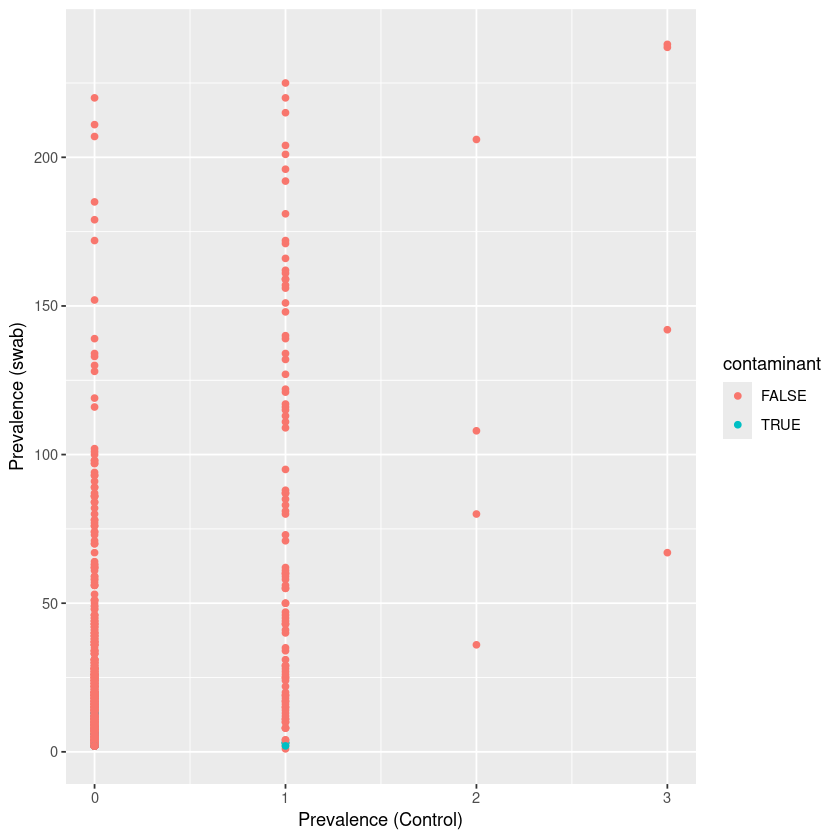

In [63]:
ggplot(data=df.pa, aes(x=pa.neg, y=pa.pos, color=contaminant)) + geom_point() +
  xlab("Prevalence (Control)") + ylab("Prevalence (swab)")

##Looks like most in neg control are exclusive to neg control (= FALSE), then a couple in a lot of samples, but that's ok. Do check if you lose a lot of sequences after this if there is an issue with what decontam is removing.

##row numbers of some of the contaminants (NOT ASV numbers)

In [64]:
head(which(contamdf.combined$contaminant))

[1] 182 348 556 603 640 879

In [65]:
##says 583, 602, 639, 666, 878, 944. So let's plot some that are contaminants and some that aren't

In [66]:
#here you can put specific contams you want to look at

Warning message in scale_y_log10(limits = c(NA, ifelse(normalize || all(plot_melt$DNA_conc <= :
“log-10 transformation introduced infinite
values.”


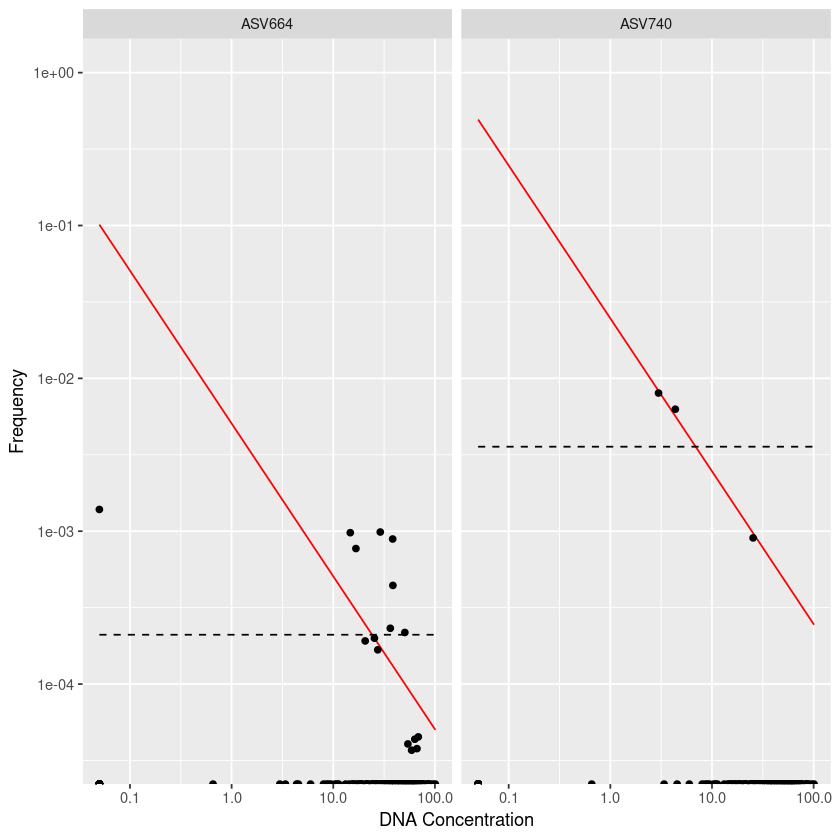

In [67]:
plot_frequency(ps.nonzero, taxa_names(ps.nonzero)[c(582, 640)], conc="quant_reading") + 
  xlab("DNA Concentration")

#here you can put the number of contams you want to look at. I looked at all 12 here

Warning message in scale_y_log10(limits = c(NA, ifelse(normalize || all(plot_melt$DNA_conc <= :
“log-10 transformation introduced infinite
values.”


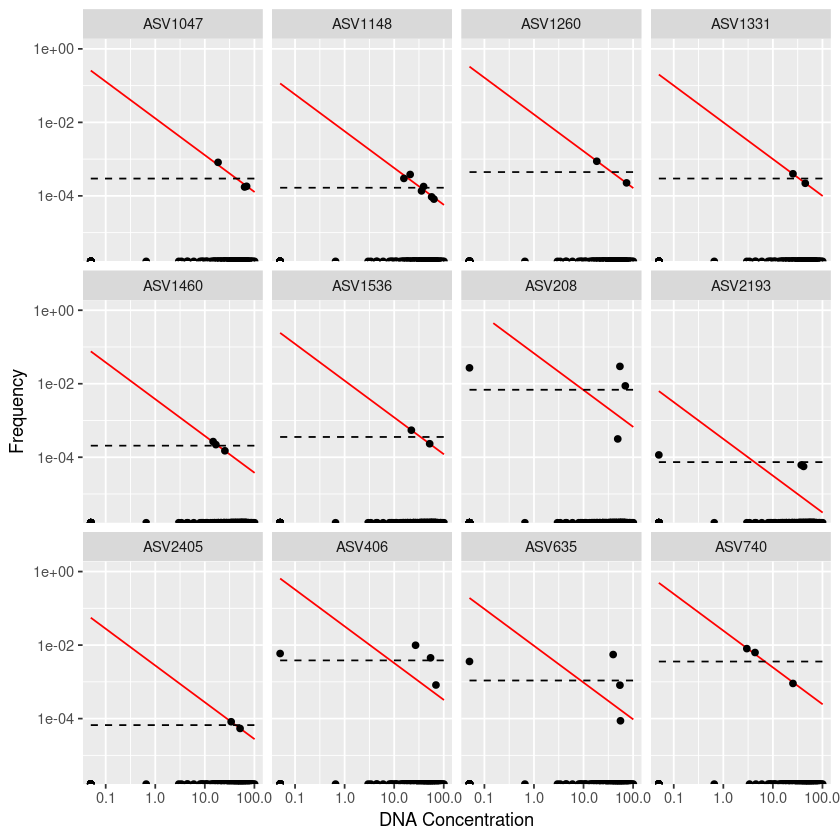

In [68]:
plot_frequency(ps.nonzero, taxa_names(ps.nonzero)[sample(which(contamdf.combined$contaminant),12)], conc="quant_reading") + xlab("DNA Concentration")

##Please list number of contaminants and what they are. You can you just put ASV#.
#ASV1047, ASV1148, ASV1260, ASV1331, ASV1460, ASV1536, ASV208, ASV2405, ASV406, 
#ASV635, ASV689, ASV740
##These are all the contaminants ASVs, plotted all of them and they all look like clear contaminants
#plots figure in folder

####----Delete Contaminants----####

#Need to delete ASVs found as contaminants by either method

In [69]:
xk4 <- prune_taxa(!contamdf.combined$contaminant, ps.nonzero)

In [70]:
xk4

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1201 taxa and 259 samples ]
sample_data() Sample Data:       [ 259 samples by 17 sample variables ]
tax_table()   Taxonomy Table:    [ 1201 taxa by 7 taxonomic ranks ]
refseq()      DNAStringSet:      [ 1201 reference sequences ]

In [71]:
sum(sample_sums(ps.nonzero)) #3716234

[1] 3686387

In [72]:
sum(sample_sums(xk4)) #3715858

[1] 3684629

In [73]:
sort(sample_sums(xk4))

NXC92222   ContSwabD0    NXC101322   NPC1017221    NXC100522 ContSwabW1S2 
           1            4            4            7            7           15 
    NPC91522 ContSwabW3S1 ContSwabW2S1        CF9D0      P1F18W1       P1F3D0 
          23           68           77          416          459          807 
     P2F11W1      P2F16D0        CF5D0      P1F17W1      P3F14D0      P1F15W2 
        1127         1412         1502         1690         1874         2049 
     P1F12D0      P2F11D0     NXC91322      P3F10D0       P4F3D0       P2F4D0 
        2103         2231         2369         2392         2458         2519 
      CF15W2      P3F17W2      P4F16D0      P2F15D0       P2F5D0      P4F13W1 
        2575         2816         2961         3157         3212         3306 
       CF2W1        CF4D0       CF17D0     PXC92222        CF2D0        CF8D0 
        3346         3420         3511         3651         3714         3797 
      P2F3D0      P1F18D0      P3F11D0        CF7D0       P1F7D0       P3F9D0 
        3840         4021         4073         4117         4139         4389 
     P3F13W1      P4F13D0     PXC91322      P3F18D0       CF18W3       P2F2D0 
        4462         4886         5090         5128         5476         5511 
     P4F11D0      P3F13D0       CF13D0      P1F14W1        CF3D0       P1F9W1 
        5517         5689         5983         6023         6250         6260 
     P4F10D0       CF15D0       P3F5D0      P3F12W1      P4F17D0       P4F2D0 
        6568         6704         6760         6782         7143         7280 
      P1F5W1      P1F17D0      P2F13W3      P1F16W2      P3F17D0       P1F7W1 
        7372         7376         7532         7795         7820         7826 
      P1F4D0      P4F15W3      P4F18D0 ContSwabW1S1     NXC10322       P1F6D0 
        7859         7993         8325         8330         8385         8596 
     P4F14D0       P4F9D0       P1F8D0        CF6D0      P1F13W1       P4F9W1 
        8624         8649         8819         9100         9147         9151 
      CF16W1      P2F18W2       P2F6D0      P4F15W1       P3F5W1       P3F8D0 
        9316         9396         9572         9757         9772         9806 
      P3F6D0       P2F6W1      P1F10D0        CF5W1       P2F3W1       P3F2D0 
        9818         9917        10032        10033        10095        10122 
     P2F12W1      P4F17W1       P1F1D0      P1F14D0       P4F4W1      P2F18W3 
       10123        10289        10326        10369        10612        10614 
      P4F5D0      P2F12D0       P4F1D0      P1F15W1        CF3W1       P2F1D0 
       10646        10799        10922        10930        11023        11164 
     P3F16D0       P4F4D0       P4F6D0       CF13W2      P4F18W1       P2F8W1 
       11246        11246        11336        11379        11420        11442 
      P4F3W1       P1F2W1      P4F16W2      P2F18W1       P4F7D0       P1F5D0 
       11528        11550        11588        11665        11862        11943 
     P1F11D0      P3F15W3      P4F18W3       CF10W1      P3F13W2       P3F4D0 
       12012        12078        12094        12108        12177        12182 
      P2F9W1      P1F13W3       CF11D0      P3F18W3      P4F13W2       CF13W1 
       12184        12302        12361        12609        12634        12890 
     P2F13W2       CF12W1      P3F18W2       CF10D0       CF13W3       P1F2D0 
       12946        13115        13119        13263        13505        13577 
     P2F18D0       P3F3W1        CF7W1       P3F4W1      P3F15W1       CF17W1 
       13599        13641        13939        14314        14320        14601 
     P1F16D0       P2F8D0      P1F13D0       CF18W1       P1F8W1      P4F15W2 
       14650        14958        15017        15316        15324        15387 
      P3F2W1       P3F7D0       P3F7W1        CF1D0       CF14D0      P2F16W1 
       15587        15671        15850        16065        16080        16102 
     P4F15D0      P2F17W1       P1F3W1       CF16D0   

In [74]:
xk4 <- subset_samples(xk4, Sample.type != "Control")

In [75]:
sort(sample_sums(xk4))

NXC92222  NXC101322 NPC1017221  NXC100522   NPC91522      CF9D0    P1F18W1 
         1          4          7          7         23        416        459 
    P1F3D0    P2F11W1    P2F16D0      CF5D0    P1F17W1    P3F14D0    P1F15W2 
       807       1127       1412       1502       1690       1874       2049 
   P1F12D0    P2F11D0   NXC91322    P3F10D0     P4F3D0     P2F4D0     CF15W2 
      2103       2231       2369       2392       2458       2519       2575 
   P3F17W2    P4F16D0    P2F15D0     P2F5D0    P4F13W1      CF2W1      CF4D0 
      2816       2961       3157       3212       3306       3346       3420 
    CF17D0   PXC92222      CF2D0      CF8D0     P2F3D0    P1F18D0    P3F11D0 
      3511       3651       3714       3797       3840       4021       4073 
     CF7D0     P1F7D0     P3F9D0    P3F13W1    P4F13D0   PXC91322    P3F18D0 
      4117       4139       4389       4462       4886       5090       5128 
    CF18W3     P2F2D0    P4F11D0    P3F13D0     CF13D0    P1F14W1      CF3D0 
      5476       5511       5517       5689       5983       6023       6250 
    P1F9W1    P4F10D0     CF15D0     P3F5D0    P3F12W1    P4F17D0     P4F2D0 
      6260       6568       6704       6760       6782       7143       7280 
    P1F5W1    P1F17D0    P2F13W3    P1F16W2    P3F17D0     P1F7W1     P1F4D0 
      7372       7376       7532       7795       7820       7826       7859 
   P4F15W3    P4F18D0   NXC10322     P1F6D0    P4F14D0     P4F9D0     P1F8D0 
      7993       8325       8385       8596       8624       8649       8819 
     CF6D0    P1F13W1     P4F9W1     CF16W1    P2F18W2     P2F6D0    P4F15W1 
      9100       9147       9151       9316       9396       9572       9757 
    P3F5W1     P3F8D0     P3F6D0     P2F6W1    P1F10D0      CF5W1     P2F3W1 
      9772       9806       9818       9917      10032      10033      10095 
    P3F2D0    P2F12W1    P4F17W1     P1F1D0    P1F14D0     P4F4W1    P2F18W3 
     10122      10123      10289      10326      10369      10612      10614 
    P4F5D0    P2F12D0     P4F1D0    P1F15W1      CF3W1     P2F1D0    P3F16D0 
     10646      10799      10922      10930      11023      11164      11246 
    P4F4D0     P4F6D0     CF13W2    P4F18W1     P2F8W1     P4F3W1     P1F2W1 
     11246      11336      11379      11420      11442      11528      11550 
   P4F16W2    P2F18W1     P4F7D0     P1F5D0    P1F11D0    P3F15W3    P4F18W3 
     11588      11665      11862      11943      12012      12078      12094 
    CF10W1    P3F13W2     P3F4D0     P2F9W1    P1F13W3     CF11D0    P3F18W3 
     12108      12177      12182      12184      12302      12361      12609 
   P4F13W2     CF13W1    P2F13W2     CF12W1    P3F18W2     CF10D0     CF13W3 
     12634      12890      12946      13115      13119      13263      13505 
    P1F2D0    P2F18D0     P3F3W1      CF7W1     P3F4W1    P3F15W1     CF17W1 
     13577      13599      13641      13939      14314      14320      14601 
   P1F16D0     P2F8D0    P1F13D0     CF18W1     P1F8W1    P4F15W2     P3F2W1 
     14650      14958      15017      15316      15324      15387      15587 
    P3F7D0     P3F7W1      CF1D0     CF14D0    P2F16W1    P4F15D0    P2F17W1 
     15671      15850      16065      16080      16102      16242      16340 
    P1F3W1     CF16D0     P1F9D0    P4F13W3      CF9W1     CF11W1    P1F15D0 
     16350      16669      16700      16905      17030      17166      17196 
    P1F1W1     CF15W1    P2F15W1    P3F17W1     P2F9D0     P4F6W1     P4F8D0 
     17245      17461      17533      17626      17631      17714      17783 
    P3F1W1    P4F12W1     CF15W3    P2F13D0    P2F14W1     P3F3D0    P1F14W3 
     17855      17985      18173      18176      18190      18319      18336 
   P1F13W2    P1F12W1     CF12D0     P4F1W1    P2F15W2     P4F5W1    P4F12D0 
     18541      18563      18573      18956      18965      18981      19077 
   P2F14D0    P4F11W1    P3F15D0     P3F9W1     P2F5W1     P2F7D0    P2F17D0 
     19207      19300   

##Let's look at positive control again, see if contaminant filtering helped

In [76]:
MicroStClean2 <- subset_samples(xk4, Sample.type %in% c("PPC", "PXC"))

##getting rid of ASvs that are not in samples of interest

In [77]:
MicroStClean2 = filter_taxa(MicroStClean2, function(x) sum(x) !=0, TRUE)

In [78]:
otu_table(MicroStClean2)

,PPC100622,PPC101722,PPC91522,PXC101322,PXC10322,PXC91322,PXC92222
ASV1,0,0,12,0,0,0,0
ASV2,0,0,0,0,0,2,0
ASV5,0,0,4,0,0,0,0
ASV13,0,0,5,0,0,0,0
ASV15,4446,6557,5969,4806,4422,2043,1442
ASV23,2418,3815,3803,4217,3831,769,295
ASV28,2063,3434,4526,3017,2660,266,284
ASV35,2427,3877,422,2999,2488,409,434
ASV40,2542,3787,1688,1615,1293,301,193
ASV41,2724,3371,436,2202,1932,384,346


In [79]:
otu_table(MicroStClean)

,PPC100622,PPC101722,PPC91522,PXC101322,PXC10322,PXC91322,PXC92222,PXC100522
ASV1,0.000000000,0.00000000,0.0005519271,0.000000000,0.00000000,0.0000000000,0.000000000,NaN
ASV2,0.000000000,0.00000000,0.0000000000,0.000000000,0.00000000,0.0003929273,0.000000000,NaN
ASV5,0.000000000,0.00000000,0.0001839757,0.000000000,0.00000000,0.0000000000,0.000000000,NaN
ASV13,0.000000000,0.00000000,0.0002299696,0.000000000,0.00000000,0.0000000000,0.000000000,NaN
ASV15,0.219165927,0.21428805,0.2745377610,0.209749924,0.21785398,0.4013752456,0.394960285,NaN
ASV23,0.119195504,0.12467728,0.1749149112,0.184043992,0.18873781,0.1510805501,0.080799781,NaN
ASV28,0.101695751,0.11222589,0.2081685218,0.131671977,0.13104739,0.0522593320,0.077786908,NaN
ASV35,0.119639160,0.12670349,0.0194094380,0.130886396,0.12257365,0.0803536346,0.118871542,NaN
ASV40,0.125308094,0.12376221,0.0776377518,0.070484005,0.06370086,0.0591355599,0.052862230,NaN
ASV41,0.134279799,0.11016700,0.0200533530,0.096102649,0.09518179,0.0754420432,0.094768557,NaN


In [80]:
tax_table(MicroStClean2)

,Kingdom,Phylum,Class,Order,Family,Genus,Species
ASV1,Bacteria,Firmicutes,Clostridia,Peptostreptococcales-Tissierellales,Peptostreptococcaceae,Romboutsia,NA
ASV2,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Rubritaleaceae,NA,NA
ASV5,Bacteria,Firmicutes,Clostridia,Clostridiales,Clostridiaceae,Clostridium sensu stricto 1,NA
ASV13,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Crocinitomicaceae,Fluviicola,NA
ASV15,Bacteria,Firmicutes,Bacilli,Bacillales,Bacillaceae,Bacillus,NA
ASV23,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia-Shigella,NA
ASV28,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Salmonella,NA
ASV35,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Limosilactobacillus,NA
ASV40,Bacteria,Firmicutes,Bacilli,Lactobacillales,Listeriaceae,Listeria,NA
ASV41,Bacteria,Firmicutes,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,NA


##Still same ones.### Genus	Truth, same for both extraction and PCR controls

#see above for numbers and what is present in postive controls

##can write a file too and make plot

In [81]:
site_species <-as(otu_table(MicroStClean2), "matrix")

In [82]:
taxonomy2 <- as(tax_table(MicroStClean2), "matrix")

In [83]:
write.csv(cbind(site_species, taxonomy2), "ZymoStandards.csv")

In [84]:
write.csv(as(otu_table(xk4), "matrix"), "vJDM_XENGPRO2022_feature_table_comborunEDIT_3_7_24.csv")

##Positive controls looked really good. 

##Can see this in XENGPRO2022_feature_table__comborunFINAL.csv

##Manually deleting the positive controls and the positive controls ASVs

#The positive control ASVs were in several of the D0 samples that were contaminated during extraction. So removing those and renaming to XENGPRO2022_feature_table_comborunFINAL.csv

######### ALPHA DIVERSITY + Bd-inhibitory Calculate and add to mapping file with seq counts  ############

In [85]:
featureTab2 <- read.csv("vJDM_XENGPRO2022_feature_table_comborunFINAL_3_7_24.csv", header = T, row.names = 1)

#make compatible for phyloseq format

In [86]:
featureTab2 = otu_table(featureTab2, taxa_are_rows = TRUE)

In [87]:
dim(featureTab2)

[1] 1190  240

#Merge it all together

In [88]:
xk6 <- merge_phyloseq(featureTab2, tax_all, meta_data, seqs) #tree)

In [89]:
xk6

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1190 taxa and 240 samples ]
sample_data() Sample Data:       [ 240 samples by 16 sample variables ]
tax_table()   Taxonomy Table:    [ 1190 taxa by 7 taxonomic ranks ]
refseq()      DNAStringSet:      [ 1190 reference sequences ]

##Huge sequence count difference, need to rarefy

In [90]:
sort(sample_sums(xk6))

CF9D0 P1F18W1  P1F3D0 P2F11W1 P2F16D0   CF5D0  P2F4D0 P1F17W1 P3F14D0 P1F15W2 
    416     454     807    1127    1412    1502    1576    1690    1874    2049 
P1F12D0 P2F11D0 P3F10D0  P4F3D0  CF15W2 P3F17W2 P4F16D0 P3F11D0 P2F15D0  P2F5D0 
   2103    2231    2392    2458    2575    2816    2961    3156    3157    3212 
P4F13W1   CF2W1   CF4D0  CF17D0   CF2D0   CF8D0  P2F3D0 P1F18D0   CF7D0  P1F7D0 
   3306    3346    3420    3511    3697    3797    3840    4021    4117    4139 
 P3F9D0 P3F13W1 P4F18D0 P4F13D0 P3F18D0  CF18W3  P2F2D0 P4F11D0 P3F13D0  CF13D0 
   4365    4462    4542    4886    5128    5476    5511    5517    5689    5983 
P1F14W1   CF3D0  P1F9W1 P4F10D0  CF15D0  P3F5D0 P3F12W1 P4F17D0  P4F2D0  P1F5W1 
   6023    6250    6260    6565    6704    6760    6782    7143    7280    7372 
P1F17D0 P2F13W3  P1F4D0  P4F6D0 P1F16W2 P3F17D0  P1F7W1 P4F15W3  P3F8D0   CF6D0 
   7376    7532    7564    7610    7795    7820    7826    7993    8527    8535 
 P1F6D0 P4F14D0  P4F9D0  P1F8D0 P1F13W1  P4F9W1  CF16W1 P2F18W2  P2F6D0 P4F15W1 
   8596    8624    8649    8782    9147    9151    9316    9396    9572    9757 
 P3F5W1  P3F6D0 P1F10D0  P2F6W1   CF5W1  P2F3W1  P3F2D0 P2F12W1 P4F17W1  P1F1D0 
   9772    9818    9839    9917   10033   10095   10122   10123   10289   10295 
 P4F7D0 P1F14D0  P4F4W1 P2F18W3  P4F4D0  P4F5D0 P2F12D0  P4F1D0 P1F15W1   CF3W1 
  10334   10369   10612   10614   10624   10646   10799   10922   10930   11023 
 P2F1D0 P3F16D0  CF13W2 P4F18W1  P2F8W1  P4F3W1  P1F2W1 P4F16W2 P2F18W1  P1F5D0 
  11060   11196   11379   11420   11442   11528   11550   11588   11665   11943 
P1F11D0 P3F15W3  P3F7D0 P4F18W3  CF10W1 P3F13W2  P3F4D0  P2F9W1  CF16D0 P1F13W3 
  12012   12078   12092   12094   12108   12177   12182   12184   12287   12302 
 CF11D0 P3F18W3 P4F13W2  CF13W1 P2F13W2  CF12W1 P3F18W2  CF10D0 P4F12D0  CF13W3 
  12323   12609   12634   12890   12946   13115   13119   13263   13399   13505 
 P1F2D0 P2F18D0  P3F3W1   CF7W1  P3F4W1 P3F15W1  CF17W1 P1F16D0  P2F8D0 P1F13D0 
  13577   13599   13641   13939   14314   14320   14601   14650   14958   14991 
 CF18W1  P1F8W1 P4F15W2  P3F2W1 P1F15D0  P3F7W1   CF1D0 P4F15D0  CF14D0 P2F16W1 
  15316   15324   15387   15587   15814   15850   16036   16056   16080   16102 
P2F17W1  P1F3W1  P1F9D0 P4F13W3   CF9W1  CF11W1  P1F1W1 P2F13D0  CF15W1 P2F15W1 
  16340   16350   16700   16905   17030   17166   17245   17421   17461   17533 
 P2F9D0 P3F17W1  P4F6W1  CF12D0  P4F8D0  P3F1W1  P3F3D0 P4F12W1  CF15W3 P2F14W1 
  17620   17626   17714   17765   17783   17855   17965   17985   18173   18190 
P1F14W3 P1F13W2 P1F12W1 P3F15D0  P2F7D0  P4F1W1 P2F15W2  P4F5W1 P2F17D0 P2F14D0 
  18336   18541   18563   18579   18659   18956   18965   18981   19029   19207 
P4F11W1  CF18D0  P3F9W1  P2F5W1 P4F10W1 P3F18W1  P1F4W1 P3F15W2 P1F16W1  P2F7W1 
  19300   19699   19714   19722   20163   20421   20665   20868   20981   20985 
  CF4W1 P4F18W2   CF8W1 P1F18W3  P1F6W1 P1F17W2 P2F10D0 P1F15W3  P3F1D0 P4F17W3 
  21299   21639   21649   21732   21849   21904   21966   21974   22141   22162 
 P2F4W1   CF1W1  P2F2W1 P2F15W3 P4F17W2  CF14W3  P2F1W1 P2F17W2 P4F16W3 P4F14W1 
  22213   22233   22283   22583   22889   22948   22948   22976   23126   23231 
P1F11W1 P3F14W1 P3F12D0 P2F10W1 P1F18W2   CF6W1 P4F16W1 P3F16W2  CF16W2  CF18W2 
  23258   23287   23330   23410   23787   24023   24064   24111   24525   24528 
P1F10W1  CF17W3 P3F11W1 P3F10W1 P2F16W2  P4F7W1  CF17W2 P3F14W2  P4F8W1  P4F2W1 
  24635   24678   24999   25140   25171   25223   25383   25565   25744   25745 
P3F17W3  P3F8W1  CF14W2 P2F13W1  CF16W3 P3F16W1 P3F14W3 P4F14W2 P4F14W3 P2F14W2 
  25813   25998   26443   27013   27083   27360   27457   27911   28006   28211 
P2F17W3 P2F14W3 P1F17W3 P3F16W3 P1F14W2  CF14W1  P3F6W1 P1F16W3 P2F16W3 P3F13W3 
  28641   29602   30975   31514   31551   31665   32050   32527   32773   36039

In [91]:
sum(sample_sums(xk6)) 

[1] 3502980

In [92]:
max(sample_sums(xk6))

[1] 36039

In [93]:
min(sample_sums(xk6))

[1] 416

In [94]:
max(sample_sums(xk6))/min(sample_sums(xk6))

[1] 86.63221

#Big sequencing difference. Look at rarefaction to see where to cut

#91x is large difference.. You want this number to be less than 10x

rarefying sample CF10D0
rarefying sample CF10W1
rarefying sample CF11D0
rarefying sample CF11W1
rarefying sample CF12D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample CF12W1
rarefying sample CF13D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample CF13W1
rarefying sample CF13W2
rarefying sample CF13W3
rarefying sample CF14D0
rarefying sample CF14W1
rarefying sample CF14W2
rarefying sample CF14W3
rarefying sample CF15D0
rarefying sample CF15W1
rarefying sample CF15W2
rarefying sample CF15W3
rarefying sample CF16D0
rarefying sample CF16W1
rarefying sample CF16W2
rarefying sample CF16W3
rarefying sample CF17D0
rarefying sample CF17W1
rarefying sample CF17W2
rarefying sample CF17W3
rarefying sample CF18D0
rarefying sample CF18W1
rarefying sample CF18W2
rarefying sample CF18W3
rarefying sample CF1D0
rarefying sample CF1W1
rarefying sample CF2D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample CF2W1
rarefying sample CF3D0
rarefying sample CF3W1
rarefying sample CF4D0
rarefying sample CF4W1
rarefying sample CF5D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample CF5W1
rarefying sample CF6D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample CF6W1
rarefying sample CF7D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample CF7W1
rarefying sample CF8D0
rarefying sample CF8W1
rarefying sample CF9D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample CF9W1
rarefying sample P1F10D0
rarefying sample P1F10W1
rarefying sample P1F11D0
rarefying sample P1F11W1
rarefying sample P1F12D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 3”


rarefying sample P1F12W1
rarefying sample P1F13D0
rarefying sample P1F13W1
rarefying sample P1F13W2
rarefying sample P1F13W3
rarefying sample P1F14D0
rarefying sample P1F14W1
rarefying sample P1F14W2
rarefying sample P1F14W3
rarefying sample P1F15D0
rarefying sample P1F15W1
rarefying sample P1F15W2
rarefying sample P1F15W3
rarefying sample P1F16D0
rarefying sample P1F16W1
rarefying sample P1F16W2
rarefying sample P1F16W3
rarefying sample P1F17D0
rarefying sample P1F17W1
rarefying sample P1F17W2
rarefying sample P1F17W3
rarefying sample P1F18D0
rarefying sample P1F18W1


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample P1F18W2
rarefying sample P1F18W3
rarefying sample P1F1D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample P1F1W1
rarefying sample P1F2D0
rarefying sample P1F2W1
rarefying sample P1F3D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 3”


rarefying sample P1F3W1
rarefying sample P1F4D0
rarefying sample P1F4W1
rarefying sample P1F5D0
rarefying sample P1F5W1
rarefying sample P1F6D0
rarefying sample P1F6W1
rarefying sample P1F7D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample P1F7W1
rarefying sample P1F8D0
rarefying sample P1F8W1
rarefying sample P1F9D0
rarefying sample P1F9W1
rarefying sample P2F10D0
rarefying sample P2F10W1
rarefying sample P2F11D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 4”


rarefying sample P2F11W1


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample P2F12D0
rarefying sample P2F12W1
rarefying sample P2F13D0
rarefying sample P2F13W1
rarefying sample P2F13W2
rarefying sample P2F13W3
rarefying sample P2F14D0
rarefying sample P2F14W1
rarefying sample P2F14W2
rarefying sample P2F14W3
rarefying sample P2F15D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample P2F15W1
rarefying sample P2F15W2
rarefying sample P2F15W3
rarefying sample P2F16D0
rarefying sample P2F16W1
rarefying sample P2F16W2
rarefying sample P2F16W3
rarefying sample P2F17D0
rarefying sample P2F17W1
rarefying sample P2F17W2
rarefying sample P2F17W3
rarefying sample P2F18D0
rarefying sample P2F18W1
rarefying sample P2F18W2
rarefying sample P2F18W3
rarefying sample P2F1D0
rarefying sample P2F1W1
rarefying sample P2F2D0
rarefying sample P2F2W1
rarefying sample P2F3D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample P2F3W1
rarefying sample P2F4D0
rarefying sample P2F4W1
rarefying sample P2F5D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 3”


rarefying sample P2F5W1
rarefying sample P2F6D0
rarefying sample P2F6W1
rarefying sample P2F7D0
rarefying sample P2F7W1
rarefying sample P2F8D0
rarefying sample P2F8W1
rarefying sample P2F9D0
rarefying sample P2F9W1
rarefying sample P3F10D0
rarefying sample P3F10W1


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample P3F11D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 4”


rarefying sample P3F11W1
rarefying sample P3F12D0
rarefying sample P3F12W1


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample P3F13D0
rarefying sample P3F13W1
rarefying sample P3F13W2
rarefying sample P3F13W3
rarefying sample P3F14D0
rarefying sample P3F14W1


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample P3F14W2
rarefying sample P3F14W3
rarefying sample P3F15D0
rarefying sample P3F15W1
rarefying sample P3F15W2
rarefying sample P3F15W3
rarefying sample P3F16D0
rarefying sample P3F16W1
rarefying sample P3F16W2
rarefying sample P3F16W3
rarefying sample P3F17D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample P3F17W1
rarefying sample P3F17W2
rarefying sample P3F17W3
rarefying sample P3F18D0
rarefying sample P3F18W1


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 3”


rarefying sample P3F18W2
rarefying sample P3F18W3
rarefying sample P3F1D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample P3F1W1
rarefying sample P3F2D0
rarefying sample P3F2W1
rarefying sample P3F3D0
rarefying sample P3F3W1
rarefying sample P3F4D0
rarefying sample P3F4W1
rarefying sample P3F5D0
rarefying sample P3F5W1
rarefying sample P3F6D0
rarefying sample P3F6W1
rarefying sample P3F7D0
rarefying sample P3F7W1
rarefying sample P3F8D0
rarefying sample P3F8W1
rarefying sample P3F9D0
rarefying sample P3F9W1
rarefying sample P4F10D0
rarefying sample P4F10W1
rarefying sample P4F11D0
rarefying sample P4F11W1
rarefying sample P4F12D0
rarefying sample P4F12W1
rarefying sample P4F13D0
rarefying sample P4F13W1


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 6”


rarefying sample P4F13W2
rarefying sample P4F13W3
rarefying sample P4F14D0
rarefying sample P4F14W1
rarefying sample P4F14W2
rarefying sample P4F14W3
rarefying sample P4F15D0
rarefying sample P4F15W1
rarefying sample P4F15W2
rarefying sample P4F15W3
rarefying sample P4F16D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 3”


rarefying sample P4F16W1
rarefying sample P4F16W2
rarefying sample P4F16W3
rarefying sample P4F17D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample P4F17W1
rarefying sample P4F17W2
rarefying sample P4F17W3
rarefying sample P4F18D0


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample P4F18W1
rarefying sample P4F18W2
rarefying sample P4F18W3
rarefying sample P4F1D0
rarefying sample P4F1W1
rarefying sample P4F2D0
rarefying sample P4F2W1
rarefying sample P4F3D0
rarefying sample P4F3W1
rarefying sample P4F4D0
rarefying sample P4F4W1
rarefying sample P4F5D0
rarefying sample P4F5W1
rarefying sample P4F6D0
rarefying sample P4F6W1
rarefying sample P4F7D0
rarefying sample P4F7W1
rarefying sample P4F8D0
rarefying sample P4F8W1
rarefying sample P4F9D0
rarefying sample P4F9W1


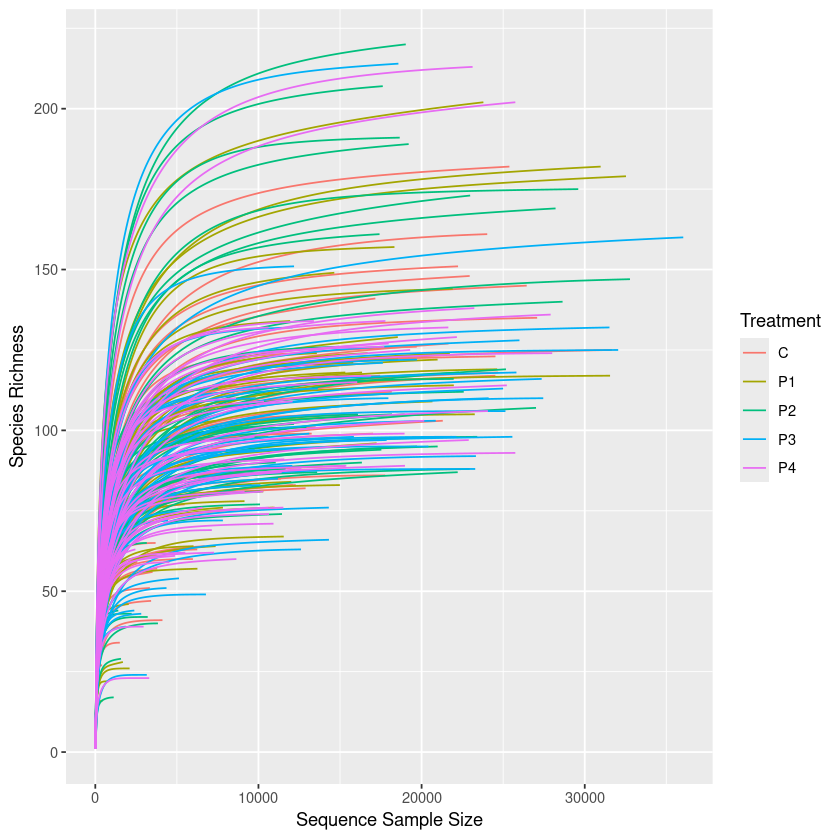

In [96]:
p <- ggrare(xk6, step = 100, color = "Treatment", se = FALSE)

##NOTE: change the xlim based on your data or ability to see lower sequence numbers

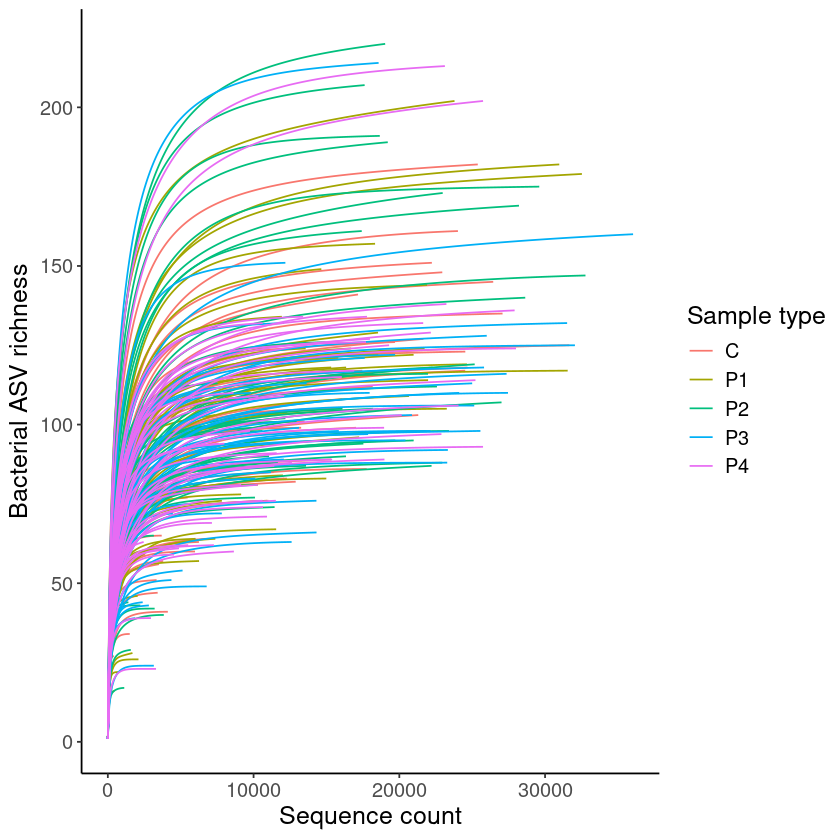

In [97]:
p + theme_bw() + theme_classic() + xlab("Sequence count") + ylab("Bacterial ASV richness") +
  theme(text = element_text(size = 15)) + labs(color='Sample type') #+xlim(0,50000)

Warning message:
“Removed 26179 rows containing missing values
or values outside the scale range
(`geom_line()`).”


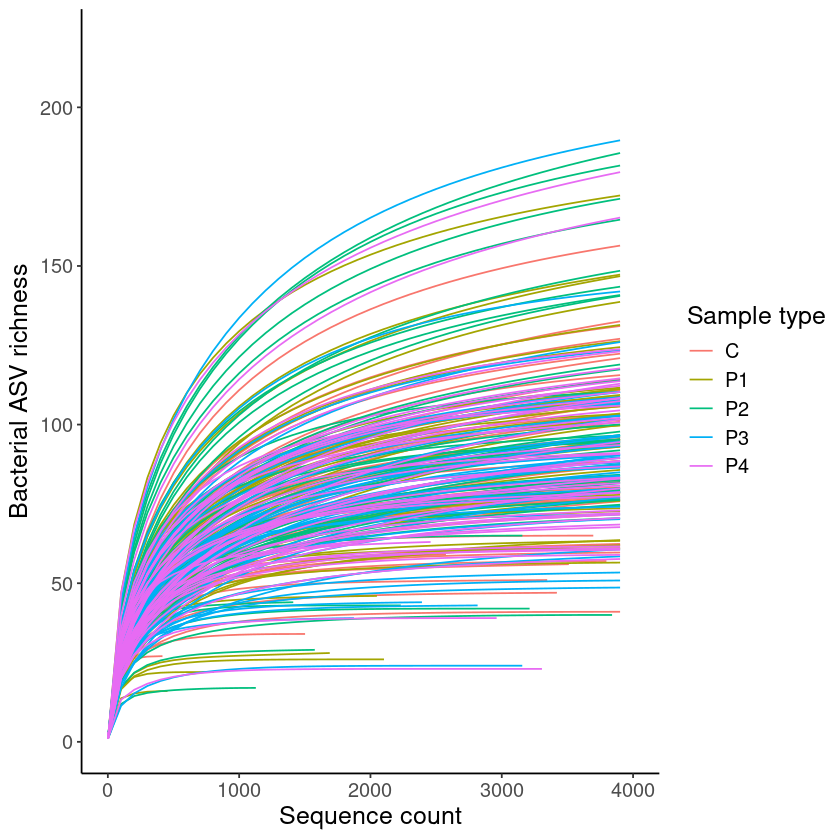

In [98]:
p + theme_bw() + theme_classic() + xlab("Sequence count") + ylab("Bacterial ASV richness") +
  theme(text = element_text(size = 15)) + labs(color='Sample type') +xlim(0,4000)

In [99]:
##drop low coverage samples, decided to cut at 2500. Drops just a few W1 and w2 samples, DO is not that critical

In [100]:
xk7 <- prune_samples(sample_sums(xk6)>2500, xk6)

In [101]:
max(sample_sums(xk7))/min(sample_sums(xk7))

[1] 13.99573

#14x difference. Will need to rarefy 

##Need to first calculate alpha on non-rarefied dataset just to have

In [102]:
dfxk7 <- as(sample_data(xk7), "data.frame")

In [103]:
t_otu7 <-t(as(otu_table(xk7), "matrix"))

#use vegan

In [104]:
AD <- estimateR(t_otu7)

In [105]:
AD <- t(as.data.frame(AD))

#need to have both alpha and df having the same column info

##Add sequence coverage info

In [106]:
seqs <- as.data.frame(sample_sums(xk7))

In [107]:
seqs$SampleID <- row.names(seqs)

#now merge to get sequence counts and alpha estimates in mapping file

In [108]:
alpha_df <- merge(dfxk7, AD,  by = "row.names")

In [109]:
alpha_df$SampleID <- alpha_df$Row.names

In [110]:
alpha_df <- merge(alpha_df, seqs, by = "SampleID")

In [111]:
row.names(alpha_df) <- alpha_df$Row.names

In [112]:
xk7Rare = rarefy_even_depth(xk7, replace=FALSE, rngseed = 999)

`set.seed(999)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(999); .Random.seed` for the full vector

...

52OTUs were removed because they are no longer 
present in any sample after random subsampling


...



##message:`set.seed(999)` was used to initialize repeatable random subsampling.
#Please record this for your records so others can reproduce.
#Try `set.seed(999); .Random.seed` for the full vector
#...
#52 OTUs were removed because they are no longer 
#present in any sample after random subsampling

##If correct, should all be at same sample sum, 2575

In [113]:
sort(sample_sums(xk7Rare))

CF10D0  CF10W1  CF11D0  CF11W1  CF12D0  CF12W1  CF13D0  CF13W1  CF13W2  CF13W3 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
 CF14D0  CF14W1  CF14W2  CF14W3  CF15D0  CF15W1  CF15W2  CF15W3  CF16D0  CF16W1 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
 CF16W2  CF16W3  CF17D0  CF17W1  CF17W2  CF17W3  CF18D0  CF18W1  CF18W2  CF18W3 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
  CF1D0   CF1W1   CF2D0   CF2W1   CF3D0   CF3W1   CF4D0   CF4W1   CF5W1   CF6D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
  CF6W1   CF7D0   CF7W1   CF8D0   CF8W1   CF9W1 P1F10D0 P1F10W1 P1F11D0 P1F11W1 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P1F12W1 P1F13D0 P1F13W1 P1F13W2 P1F13W3 P1F14D0 P1F14W1 P1F14W2 P1F14W3 P1F15D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P1F15W1 P1F15W3 P1F16D0 P1F16W1 P1F16W2 P1F16W3 P1F17D0 P1F17W2 P1F17W3 P1F18D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P1F18W2 P1F18W3  P1F1D0  P1F1W1  P1F2D0  P1F2W1  P1F3W1  P1F4D0  P1F4W1  P1F5D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
 P1F5W1  P1F6D0  P1F6W1  P1F7D0  P1F7W1  P1F8D0  P1F8W1  P1F9D0  P1F9W1 P2F10D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P2F10W1 P2F12D0 P2F12W1 P2F13D0 P2F13W1 P2F13W2 P2F13W3 P2F14D0 P2F14W1 P2F14W2 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P2F14W3 P2F15D0 P2F15W1 P2F15W2 P2F15W3 P2F16W1 P2F16W2 P2F16W3 P2F17D0 P2F17W1 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P2F17W2 P2F17W3 P2F18D0 P2F18W1 P2F18W2 P2F18W3  P2F1D0  P2F1W1  P2F2D0  P2F2W1 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
 P2F3D0  P2F3W1  P2F4W1  P2F5D0  P2F5W1  P2F6D0  P2F6W1  P2F7D0  P2F7W1  P2F8D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
 P2F8W1  P2F9D0  P2F9W1 P3F10W1 P3F11D0 P3F11W1 P3F12D0 P3F12W1 P3F13D0 P3F13W1 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P3F13W2 P3F13W3 P3F14W1 P3F14W2 P3F14W3 P3F15D0 P3F15W1 P3F15W2 P3F15W3 P3F16D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P3F16W1 P3F16W2 P3F16W3 P3F17D0 P3F17W1 P3F17W2 P3F17W3 P3F18D0 P3F18W1 P3F18W2 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P3F18W3  P3F1D0  P3F1W1  P3F2D0  P3F2W1  P3F3D0  P3F3W1  P3F4D0  P3F4W1  P3F5D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
 P3F5W1  P3F6D0  P3F6W1  P3F7D0  P3F7W1  P3F8D0  P3F8W1  P3F9D0  P3F9W1 P4F10D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P4F10W1 P4F11D0 P4F11W1 P4F12D0 P4F12W1 P4F13D0 P4F13W1 P4F13W2 P4F13W3 P4F14D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P4F14W1 P4F14W2 P4F14W3 P4F15D0 P4F15W1 P4F15W2 P4F15W3 P4F16D0 P4F16W1 P4F16W2 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
P4F16W3 P4F17D0 P4F17W1 P4F17W2 P4F17W3 P4F18D0 P4F18W1 P4F18W2 P4F18W3  P4F1D0 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
 P4F1W1  P4F2D0  P4F2W1  P4F3W1  P4F4D0  P4F4W1  P4F5D0  P4F5W1  P4F6D0  P4F6W1 
   2575    2575    2575    2575    2575    2575    2575    2575    2575    2575 
 P4F7D0  P4F7W1  P4F8D0  P4F8W1  P4F9D0  P4F9W1 
   2575    2575    2575    2575    2575    2575

In [115]:
sum(sample_sums(xk7Rare)) 

[1] 581950

In [116]:
max(sample_sums(xk7Rare)) 

[1] 2575

In [117]:
min(sample_sums(xk7Rare)) 

[1] 2575

In [118]:
t_otuR <-t(as(otu_table(xk7Rare), "matrix"))

##Add sequence coverage info

In [128]:
write.csv(as(otu_table(xk7Rare), "matrix"), "vJDM_XENGPRO2022_feature_table_comborunFINAL_rarefy_3_7_24.csv")

In [119]:
##above is writing a new csv with the updated rarefaction counts of ASVs

In [120]:
seqsRare <- as.data.frame(sample_sums(xk7Rare))

In [121]:
seqsRare$SampleID <- row.names(seqsRare)

##ADD alpha estimates for rarefied dataset. WE are using this for analyses, but if you have even coverage <10x variation then you don't need to rarefy. I have rationale for this if interested

In [122]:
AD2 <- estimateR(t_otuR)

In [123]:
AD2 <- t(as.data.frame(AD2))

In [124]:
AD2

,S.obs,S.chao1,se.chao1,S.ACE,se.ACE
CF10D0,85,89.23077,3.559704,91.90042,4.708930
CF10W1,67,68.25000,1.731967,68.96292,4.044287
CF11D0,110,125.00000,7.949088,130.44529,5.594307
CF11W1,115,142.00000,13.539843,135.40225,5.539862
CF12D0,69,84.30000,9.561540,86.82047,4.786195
CF12W1,99,102.88235,3.194509,105.71870,4.875527
CF13D0,58,58.50000,1.026478,58.99577,3.781642
CF13W1,76,82.11111,4.975090,82.86539,4.472323
CF13W2,80,81.36364,1.736485,82.62168,4.454834
CF13W3,90,92.33333,2.423058,93.36082,4.673861


In [125]:
colnames(AD2)[colnames(AD2)=="S.obs"] <- "S.obs_rare"

In [126]:
colnames(AD2)[colnames(AD2)=="S.chao1"] <- "S.chao1_rare"

In [127]:
colnames(AD2)[colnames(AD2)=="S.ACE"] <- "S.ACE_rare"

#now merge to get rarefied sequence counts and alpha estimates in mapping file

In [128]:
alpha_df_rare <- merge(AD2, seqsRare, by = "row.names")

In [129]:
alpha_df_rare$SampleID <- alpha_df_rare$Row.names

#now merge to get SR and PD of rarefied in mapping file

##you could get a warning about duplicate row.names, but that's fine. Didn't here

In [130]:
alpha_df2 <- merge(alpha_df, alpha_df_rare, by = "SampleID")

In [131]:
alpha_df2

SampleID,Row.names.x,quant_reading,Treatment,FrogID,FrogNo,DayWeekNo,Sample.type,TrmtTP,TubeLabel,⋯,S.ACE,se.ACE.x,sample_sums(xk7),Row.names.y,S.obs_rare,S.chao1_rare,se.chao1.y,S.ACE_rare,se.ACE.y,sample_sums(xk7Rare)
<I<chr>>,<I<chr>>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CF10D0,CF10D0,25.40,C,F10,10,D0,swab,CD0,CF10D0,⋯,99.17946,4.670589,13263,CF10D0,85,89.23077,3.559704,91.90042,4.708930,2575
CF10W1,CF10W1,43.20,C,F10,10,W1,swab,CW1,CF10W1,⋯,84.27298,4.199712,12108,CF10W1,67,68.25000,1.731967,68.96292,4.044287,2575
CF11D0,CF11D0,18.90,C,F11,11,D0,swab,CD0,CF11D0,⋯,124.67073,5.391325,12323,CF11D0,110,125.00000,7.949088,130.44529,5.594307,2575
CF11W1,CF11W1,50.20,C,F11,11,W1,swab,CW1,CF11W1,⋯,145.72965,5.520956,17166,CF11W1,115,142.00000,13.539843,135.40225,5.539862,2575
CF12D0,CF12D0,35.60,C,F12,12,D0,swab,CD0,CF12D0,⋯,86.00000,4.452593,17765,CF12D0,69,84.30000,9.561540,86.82047,4.786195,2575
CF12W1,CF12W1,46.80,C,F12,12,W1,swab,CW1,CF12W1,⋯,110.92021,4.516320,13115,CF12W1,99,102.88235,3.194509,105.71870,4.875527,2575
CF13D0,CF13D0,8.60,C,F13,13,D0,swab,CD0,CF13D0,⋯,60.00000,3.549648,5983,CF13D0,58,58.50000,1.026478,58.99577,3.781642,2575
CF13W1,CF13W1,54.60,C,F13,13,W1,swab,CW1,CF13W1,⋯,82.75256,3.997456,12890,CF13W1,76,82.11111,4.975090,82.86539,4.472323,2575
CF13W2,CF13W2,58.40,C,F13,13,W2,swab,CW2,CF13W2,⋯,85.66188,4.127143,11379,CF13W2,80,81.36364,1.736485,82.62168,4.454834,2575


##ANTI-Bd bac calculations

In [132]:
my_antiBd <- read.csv("blast-WoodhamsStrictXengPro2022comborun.csv", header = T, stringsAsFactors = F)

In [133]:
my_antiBd

X,Sequence.Name,Sequence,X..Identical.Sites,X..Pairwise.Identity,Sequence.Length
<chr>,<chr>,<chr>,<chr>,<chr>,<int>
ASV2008,Mada.2173.Madagascar.Wild.Bd.Inhibitory,TACGTAGGGTACGAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCTCGTAGGTGGTTGGTCACGTCTGCTGTGGAAACGCAACGCTTAACGTTGCGCGTGCAGTGGGTACGGGCTGACTAGAGTGCAGTAGGGGAGTCTGGAATTCCTGGTGTAGCGGTGAAATGCGCAGATATCAGGAGGAACACCGGTGGCGAAGGCGGGACTCTGGGCTGTAACTGACACTGAGGAGCGAAAGCATGGGGAGCGAACAGGATTAGATACCCTGGTAGTCCATGCCGTAAACGTTGGGCACTAGGTGTGGGGGGCATTCCACGTTCTCCGCGCCGTAGC,100.00%,100.00%,331
ASV1905,628A.USA.Wild.Bd.AP.Assay.Inhibitory,TACGTAGGGCGCAAGCGTTATCCGGAATTATTGGGCGTAAAGAGCTCGTAGGCGGTTTGTCGCGTCTGCCGTGAAAGTCCGGGGCTCAACCCCGGATCTGCGGTGGGTACGGGCAGACTAGAGTGATGTAGGGGAGACTGGAATTCCTGGTGTAGCGGTGAAATGCGCAGATATCAGGAGGAACACCGATGGCGAAGGCAGGTCTCTGGGCATTAACTGACGCTGAGGAGCGAAAGCATGGGGAGCGAACAGGATTAGATACCCTGGTAGTCCATGCCGTAAACGTTGGGCACTAGGTGTGGGGGACATTCCACGTTTTCCGCGCCGTAGCTAACGCATTAAGTGCCCCGCCTGGGGAGTACGGCCGCAAGGCTAAAACTCAAAGGAAT,100.00%,100.00%,389
ASV1806,BFE18A.USA.Wild.Bd.Inhibitory,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTCTGTCAAGTCGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCGAAACTGGCAGGCTAGAGTCTTGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCGACTTGGAGGTTGTTCCCTTGAGGAGTGGCTTCCGGAGCTAACGCGTTAAGTCGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAAT,100.00%,100.00%,387
ASV1793,THA2.2.USA.Wild.Bd.Inhibitory,TTACTCGGAATTACTGGGCGTAAAGCGTGCGTAGGTGGTTGTTTAAGTCTGTTGTGAAAGCCCTGGGCTCAACCTGGGAATTGCAGTGGATACTGGGCGACTAGAGTGTGGTAGAGGGTAGTGGAATTCCCGGTGTAGCAGTGAAATGCGTAGAGATCGGGAGGAACATCCATGGCGAAGGCAGCTACCTGGACCAACACTGACACTGAGGCACGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCCTAAACGATGCGAACTGGATGTTGGGTGCAATTTGGCACGCAGTATCGAAGCTAACGCGTTAAGTTCGCCGCCTGGGGAGTACGGTCGCAAGACTGAAACTCAAAGGAAT,100.00%,100.00%,371
ASV1299,A.lugubris3.USA.Wild.Bd.Inhibitory,GTGAAAGCCCAGGGCTCAACCTTGGAATTGCCTTTGATACTGGCAGTCTTGAGTACGGAAGAGGTATGTGGAACTCCGAGTGTAGAGGTGAAATTCGTAGATATTCGGAAGAACACCAGTGGCGAAGGCGACATACTGGTCCGTTACTGACGCTGAGGCTCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGAGTGCTAGTTGTCGGCATGCATGCATGTCGGTGACGCAGCTAACGCATTAAGCACTCCGCCTGGGGAGTACGGTCGCAAGATTAAAACTCAAAGGAAT,100.00%,100.00%,316
ASV1206,BFE18E.USA.Wild.Bd.Inhibitory,TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCACGCAGGCGGTCTGTCAAGTCGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATCCGAAACTGGCAGGCTAGAGTCTTGTAGAGGGGGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGGTGGCGAAGGCGGCCCCCTGGACAAAGACTGACGCTCAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCGACTTGGAGGTTGTGCCCTTGAGGCGTGGCTTCCGGAGCTAACGCGTTAAGTCGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAAT,100.00%,100.00%,387
ASV1090,AL2.USA.Wild.Bd.Inhibitory,TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTCGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGTCGAGCTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAATGAAT,100.00%,100.00%,387
ASV963,Panama68B.Panama.Wild.Bd.Inhibitory,TACGAAGGGTGCAAGCGTTACTCGGAATTACTGGGCGTAAAGCGTGCGTAGGTGGTCGTTTAAGTCTGTTGTGAAAGCCCTGGGCTCAACCTGGGAACTGCAGTGGAAACTGGACGACTAGAGTGTGGTAGAGGGTAGCGGAATTCCTGGTGTAGCAGTGAAATGCGTAGAGATCAGGAGGAACATCCATGGCGAAGGCAGCTACCTGGACCAACACTGACACTGAGGCACGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCCTAAACGATGCGAACTGGATGTTGGGTGCAATTTGGCACGCAGTATCGAAGCTAACGCGTTAAGTTCGCCGCCTGGGGAGTACGGTCGCAAGACTGAAACTCAAAGGAAT,100.00%,100.00%,388
ASV949,VF11.Colombia.Wild.Bd.AP.Assay.Inhibitory,TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTAGTTAAGTTGGATGTGAAATCCCCGGGCTCAACCTGGGAACTGCATTCAAAACTGACTGACTAGAGTATGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGTCAACTAGCCGTTGGGAGCCTTGAGCTCTTAGTGGCGCAGCTAACGCATTAAGTTGACCGCCTGGGGAGTACGGCCGCAAGGTTAAAACTCAAA

In [134]:
str(my_antiBd$X..Pairwise.Identity)

 chr [1:48] "100.00%" "100.00%" "100.00%" "100.00%" "100.00%" "100.00%" ...


In [135]:
my_antiBd <- my_antiBd[my_antiBd$X..Pairwise.Identity > 0.999,]

In [136]:
my_antiBd$X..Pairwise.Identity

[1] "100.00%" "100.00%" "100.00%" "100.00%" "100.00%" "100.00%" "100.00%"
 [8] "100.00%" "100.00%" "100.00%" "100.00%" "100.00%" "100.00%" "100.00%"
[15] "100.00%" "100.00%" "100.00%" "100.00%" "100.00%" "100.00%" "100.00%"
[22] "100.00%" "100.00%" "100.00%" "100.00%" "100.00%" "100.00%" "100.00%"
[29] "100.00%" "100.00%" "100.00%" "100.00%" "100.00%" "100.00%" "100.00%"
[36] "100.00%" "100.00%" "100.00%" "100.00%" "100.00%" "100.00%" "100.00%"
[43] "100.00%" "100.00%" "100.00%" "100.00%" "100.00%" "100.00%"

In [137]:
my_antiBd <- my_antiBd[,1]

In [138]:
str(my_antiBd)

 chr [1:48] "ASV2008" "ASV1905" "ASV1806" "ASV1793" "ASV1299" "ASV1206" ...


##Need an ASV ID in the taxonomy table to match to

In [139]:
xk7Rare

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1138 taxa and 226 samples ]
sample_data() Sample Data:       [ 226 samples by 16 sample variables ]
tax_table()   Taxonomy Table:    [ 1138 taxa by 7 taxonomic ranks ]
refseq()      DNAStringSet:      [ 1138 reference sequences ]

In [140]:
tax_table(xk7Rare) <- cbind(tax_table(xk7Rare), ASV=taxa_names(xk7Rare))

In [141]:
xk7Anti <-  subset_taxa(xk7Rare, ASV %in% my_antiBd)

##Add estimated anti-Bd bac richness to metadata

In [142]:
dfxk7A <- as(sample_data(xk7Anti), "data.frame")

In [143]:
t_otu7A <-t(as(otu_table(xk7Anti), "matrix"))

#use vegan

In [144]:
AD3 <- estimateR(t_otu7A)

In [145]:
AD3 <- t(as.data.frame(AD3))

In [146]:
AD3

,S.obs,S.chao1,se.chao1,S.ACE,se.ACE
CF10D0,4,4.0,0.4330127,4.500000,0.9681668
CF10W1,3,3.0,0.0000000,3.000000,0.8164966
CF11D0,8,8.0,0.0000000,8.000000,1.2247449
CF11W1,9,10.0,2.2583180,10.231405,1.4092941
CF12D0,2,2.0,0.3535534,3.102041,0.8243615
CF12W1,6,6.0,0.0000000,6.000000,1.1547005
CF13D0,2,2.0,0.0000000,2.000000,0.0000000
CF13W1,3,3.0,0.0000000,3.000000,0.8164966
CF13W2,2,2.0,0.3535534,3.093750,0.9021349
CF13W3,3,3.0,0.0000000,3.000000,0.8164966


In [147]:
colnames(AD3)[colnames(AD3)=="S.obs"] <- "S.obs_anti"

In [148]:
colnames(AD3)[colnames(AD3)=="S.chao1"] <- "S.chao1_anti"

In [149]:
colnames(AD3)[colnames(AD3)=="S.ACE"] <- "S.ACE_anti"

##Add sequence coverage info

In [150]:
seqsAnti <- as.data.frame(sample_sums(xk7Anti))

In [151]:
seqsAnti$SampleID <- row.names(seqsAnti)

#now merge to get rarefied sequence counts and alpha estimates in mapping file of anti-Bd bac

In [152]:
alpha_df_anti <- merge(AD3, seqsAnti, by = "row.names")

In [153]:
alpha_df_anti$SampleID <- alpha_df_anti$Row.names

#now merge to get SR and PD of rarefied in mapping file

##you get a warning about duplicate row.names, but that's fine.

In [154]:
alpha_df3 <- merge(alpha_df2, alpha_df_anti, by = "SampleID")

##you could get a warning about duplicate row.names, but that's fine. 

In [169]:
write.csv(alpha_df3, "XENGPro2022_meta_FINAL_3_7_24_with_anti.csv", row.names = F)

##Now add a column to divide sequenc counts anti-Bd bac by total sequence counts OF the RAREFIED total sequence counts = 2576 

#Double check that all the names are coming out correctly in the merging

#save as XENGPro2022_meta_FINAL_2_26_24_anti.csv

##This now is your clean file. All negs are removed and all samples with low coverage, anti-estimated, etc.

##delete the first two columns that were introduced into the file, but not needed